# Python EDA Project - John Kramarczyk

# Project Overview

<div class="alert alert-block alert-success">Source of my data with direct link to to my data.</div>

I am using data found at http://www.inalitic.com/datasets/nhl%20player%20data.html

The data contains 22 categories of offensive statistics in the NHL for every season from 1940 to 2018.


<div class="alert alert-block alert-success">Why I chose this data.</div>

I have had a lifelong interest in NHL hockey and have always been under the impression that players who rack up more offensive categories are more likely to score more points (goals and assists) in a season. I also suspect these players are more likely be on the team that wins the Stanley Cup.

<div class="alert alert-block alert-success">Brief overview of my goals for this project.</div>

To capture and analyze seasons of data from 1999-2018 to confirm or deny my impression that players who achieve higher offensive statistics lead to more goals and assists scored. I also want to explore how other factors, like a player's position, age, shots taken, and time-on-ice, may or may not result in higher points scored in each season.

<div class="alert alert-block alert-success">Reading my data into this notebook to commence project.</div>

In [2]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

nhl_stats = pd.read_csv('nhl_stats.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<div class="alert alert-block alert-success">Inspecting my data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [3]:
nhl_stats.info()
nhl_stats.head()
nhl_stats.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37825 entries, 0 to 37824
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37825 non-null  object 
 1   Season      37825 non-null  int64  
 2   Player      37825 non-null  object 
 3   Age         37823 non-null  float64
 4   Tm          37825 non-null  object 
 5   Pos         37825 non-null  object 
 6   GP          37825 non-null  int64  
 7   G           37825 non-null  object 
 8   GPG         37825 non-null  float64
 9   A           37825 non-null  object 
 10  PTS         37825 non-null  object 
 11  +/-         33913 non-null  object 
 12  PIM         37824 non-null  object 
 13  EVG         34537 non-null  object 
 14  PPG         34537 non-null  object 
 15  SHG         34537 non-null  object 
 16  GWG         34537 non-null  object 
 17  EVA         33913 non-null  object 
 18  PPA         33913 non-null  object 
 19  SHA         33913 non-nul

,Unnamed: 0,Season,Player,Age,Tm,Pos,GP,G,GPG,A,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018Justin Abdelkader,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,...,-,110,12,"1,241",16:33,40.0,174.0,47.0,50.0,48.5
1,2018Pontus Aberg,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,...,-,70,6,645,12:10,8.0,24.0,4.0,8.0,33.3
2,2018Noel Acciari,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,...,-,66,15,775,12:55,41.0,152.0,42.0,51.0,45.2
3,2018Kenny Agostino,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,...,-,11,-,60,12:03,1.0,4.0,0.0,1.0,0.0
4,2018Sebastian Aho,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,...,-,200,15,"1,398",17:55,17.0,65.0,78.0,94.0,45.3


,Unnamed: 0,Season,Player,Age,Tm,Pos,GP,G,GPG,A,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
37820,1940Gordie Drillon*,1940,Gordie Drillon*,26.0,TOR,RW,43,21,0.4884,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37821,1940Bill Cowley*,1940,Bill Cowley*,27.0,BOS,C,48,13,0.2708,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37822,1940Woody Dumart*,1940,Woody Dumart*,23.0,BOS,LW,48,22,0.4583,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37823,1940Bobby Bauer*,1940,Bobby Bauer*,24.0,BOS,RW,48,17,0.3542,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37824,1940Milt Schmidt*,1940,Milt Schmidt*,21.0,BOS,C,48,22,0.4583,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA Phase 1

<div class="alert alert-block alert-success">
    
1. What I hope to learn from this data project. 
2. My hunch about what this data will reveal.
</div>

1. I hope to identify any positive or negative significant patterns and correlations between 'Goals', 'Assists', and 'Points' and the following NHL offensive statistics: 'Season', 'Age', 'Team', 'Position', 'Games Played', 'Shots', 'Shot Percentage', 'Time-On-Ice', 'Blocks', and 'Hits'. More specifically, I hope to learn about which of the aforementioned offensive categories may or may not correlate to earning more 'Goals' and 'Assists' ('Points') in any given season. I also hope to learn about whether or not blocks and hits correlate with higher goals, assists, and points earned and which seasons and positions tallied the most goals and assists (points). I would also like to explore which position typically scores more goals and assists in a season.
2. I have a hunch this data will reveal that players who earn higher offensive stats in categories like 'Games Played', 'Shots', and 'Time-On-Ice' are typically more likely to score more 'Goals' and 'Assists' ('Points') in a season than players who earn less in these categories. Also, based on the nature of each position, I have a hunch that left-wing (LW) and right-wing (RW) positions will score the most goals, centers (C) will earn the most assists, and defensemen (D) and centers (C) will earn the most 'Blocks and 'Hits' per season. I also have a hunch that 'Blocks' and 'Hits' will correlate less with 'Goals' and 'Assists' ('Points') earned in a season with the exception of a few outlier players.

<div class="alert alert-block alert-success">
    
1. The population being represented by the data you’ve chosen.
2. The total sample size.
</div>

1. The population being represented is every NHL player from 1940-2018 who earned at least one offensive statistic in one category.
2. 37,826 rows and 28 rows which contains every NHL player who earned an offensive statistic from 1940-2018

<div class="alert alert-block alert-success">How the data was collected.</div>

The data was collected from publicly available NHL stats stored at https://www.hockey-reference.com/ and http://www.inalitic.com/datasets/nhl%20player%20data.html
This is not a random sample and sampling weights are not used. The data collected contains only offensive categories during a specific period of time (1940-2018).

<div class="alert alert-block alert-success">Data dictionary and variables that will be used for this project.</div>

0. Unnamed: 0 = (string type)  combined data on season and player name
1. Season = (integer type)  year played by the corresponding NHL player - <b>WILL BE USED</b>
2. Player = (string type)  name of corresponding NHL player - <b>WILL BE USED</b>
3. Age = (float type)  age of corresponding NHL player - <b>WILL BE USED</b>
4. Tm = (string type)  team of corresponding NHL player - <b>WILL BE USED</b>
5. Pos = (string type)  position of corresponding NHL player - <b>WILL BE USED</b>
6. GP = (integer type)  games played by corresponding NHL player in in corresponding season - <b>WILL BE USED</b>
7. G = (string type)  goals scored by corresponding NHL player in corresponding season - <b>WILL BE USED</b>
8. GPG = (float type)  goals scored per game by corresponding NHL player in corresponding season - <b>WILL BE USED</b>
9. A = (string type)  assists earned by corresponding NHL player in corresponding season - <b>WILL BE USED</b>
10. PTS = (string type)  totals points scored by corresponding NHL player in corresponding season - <b>WILL BE USED</b>
11. +/- = (string type)  plus\minus of corresponding NHL player in corresponding season
12. PIM = (string type)  penalties in minutes by corresponding NHL player in corresponding season
13. EVG = (string type)  even strength goals scored by corresponding NHL player in corresponding season
14. PPG = (string type)  power play goals scored by corresponding NHL player in corresponding season
15. SHG = (string type)  shorthanded goals scored by corresponding NHL player in corresponding season
16. GWG = (string type)  game-winning-goals scored by corresponding NHL player in corresponding season
17. EVA = (string type)  even strength assists scored by corresponding NHL player in corresponding season
18. PPA = (string type)  power play assists earned by corresponding NHL player in corresponding season
19. SHA = (string type)  shorthanded assists earned by corresponding NHL player in corresponding season
20. S = (string type)  total shots of corresponding NHL player in corresponding season - <b>WILL BE USED</b>
21. S% = (string type)  shot percentage of corresponding NHL player in corresponding season - <b>WILL BE USED</b>
22. TOI = (string type)  total time-on-ice of corresponding NHL player in corresponding season - <b>WILL BE USED</b>
23. ATOI = (string type)  average time-on-ice per game of corresponding NHL player in corresponding season
24. BLK = (float type)  total number of blocks of corresponding NHL player in corresponding season - <b>WILL BE USED</b>
25. HIT = (float type)  total number of hits by corresponding NHL player in corresponding season - <b>WILL BE USED</b>
26. FOwin = (float type)  total number of face-off wins by corresponding NHL player in corresponding season
27. FOloss = (float type)  total number of face-off losses by corresponding NHL player in corresponding season
28. FO% =  (float type)  total face-off win percentage of corresponding NHL player in corresponding season

<div class="alert alert-block alert-success">Data cleaning. EAxplanations for each step provided after each line of code</div>

In the first step, a variable 'col_to_drop' was created. This variable contains all columns to be dropped because they are not relevant to this data analysis.
'nhl_stats2' is created as a new dataframe (basically renaming the current dataframe) in order to differentiate between the original dataframe with all 29 columns and the new dataframe with the irrelevant 14 columns dropped, 15 columns remaining.
All remaining relevant 15 columns were renamed to provide easier interpretation for users who may not be familiar with NHL acronyms.

In [4]:
nhl_stats.shape #number of rows and columns in the dataframe 'nhl_stats'
col_to_drop = ['Unnamed: 0', '+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GWG', 'EVA', 'PPA', 'SHA', 'ATOI', 'FOwin', 'FOloss', 'FO%'] #variable created that includes all columns to be dropped because they are not relevant to the data analysis
nhl_stats2 = nhl_stats.drop(columns=col_to_drop, inplace=False) #new dataframe named nhl_stats2 that uses the col_to_drop variable to reflect all irrelevant 14 columns dropped 
nhl_stats2.shape # confirmation that 14 of of 29 columns eliminated; showing 15 columns remain
nhl_stats2_cols = ['season', 'player', 'age', 'team', 'position', 'games_played', 'goals', 'goals_per_game', 'assists', 'points', 'shots', 'shot_percentage', 'time_on_ice', 'blocks', 'hits'] #variable to rename columns for easier interpretation
nhl_stats2.columns = nhl_stats2_cols #nhl_stats2_col variable used to rename the main dataframe's remaining 15 columns
nhl_stats2.columns #print confirmation that all 15 columns are successfully renamed

(37825, 29)

(37825, 15)

Index(['season', 'player', 'age', 'team', 'position', 'games_played', 'goals',
       'goals_per_game', 'assists', 'points', 'shots', 'shot_percentage',
       'time_on_ice', 'blocks', 'hits'],
      dtype='object')

Although all irrelevant columns have been removed, all missing values in each row must be identified before the data can be properly analyzed.'nhl_stats2.isnull().sum()' is used to check for all missing values in each column.

In [5]:
nhl_stats2.shape #confirms 14 columns removed and 15 columns remain
nhl_stats2.isnull().sum() #reveals how all missing values in each column

(37825, 15)

season                 0
player                 0
age                    2
team                   0
position               0
games_played           0
goals                  0
goals_per_game         0
assists                0
points                 0
shots               3914
shot_percentage     5102
time_on_ice        21200
blocks             28151
hits               28141
dtype: int64

Since it is possible that some players may not record a block or hit during a season, the 'dropna' function is not used on the entire dataframe 'nhl_stats2'. Rather, variables are created for all rows in each column that contain missing values except blocks and hits, the missing rows are dropped, and the dataframe is updated. 

All rows with missing values in 'age' series removed from nhl_stats2

In [6]:
missing_age = nhl_stats2[nhl_stats2.age.isnull()] #all values in series 'age' that are missing values
nhl_stats2 = nhl_stats2.drop(missing_age.index) #nhl_stats2 updated with variable that removes all rows with missing values in 'age' series

All rows with missing values in 'shots' series removed from nhl_stats2

In [7]:
missing_shots = nhl_stats2[nhl_stats2.shots.isnull()] #all values in series 'shots' that are missing values
nhl_stats2 = nhl_stats2.drop(missing_shots.index) #nhl_stats2 updated with variable that removes all rows with missing values in 'shots' series

All rows with missing values in 'shot_percentage' series removed from nhl_stats2

In [8]:
missing_shot_percentage = nhl_stats2[nhl_stats2.shot_percentage.isnull()] #all values in series 'shot_percentage' that are missing values
nhl_stats2 = nhl_stats2.drop(missing_shot_percentage.index) #nhl_stats2 updated with variable that removes all rows with missing values in 'shot_percentage' series

All rows with missing values in 'time_on_ice' series removed from nhl_stats2

In [9]:
missing_time_on_ice = nhl_stats2[nhl_stats2.time_on_ice.isnull()] #all rows in series 'time_on_ice' that are missing values
nhl_stats2 = nhl_stats2.drop(missing_time_on_ice.index) #nhl_stats2 updated with variable that removes all rows with missing values in 'time_on_ice' series

Below, nhl_stats2.shape is used to confirm 21,754 rows with missing values were dropped from nhl_stats2 (excludes blocks and hits). 37,825 original number of rows. 16,071 rows remain.

'nhl_stats2.isnull().sum()' is used to confirm all rows with missing values in 'age', 'shots', shot_percentage', and 'time_on_ice' were indeed dropped from nhl_stats2

Blocks and hits are only columns remaining with missing values. Since it is possible that NHL players can go through an entire season without recording a block or hit, the rows with missing values are not dropped. Rather, all missing values are replaced with 0 with 'nhl_stats2.fillna(0, inplace=True)'.


'nhl_stats2.isnull().sum()' is used again to confirm no missing values remain.

In [10]:
nhl_stats2.shape #used to confirm rows dropped from nhl_stats2
nhl_stats2.isnull().sum() #used to reveal remaining rows with missing values
nhl_stats2.fillna(0, inplace=True)
nhl_stats2.isnull().sum() #used to reveal remaining rows with missing values
nhl_stats2.shape

(16071, 15)

season                0
player                0
age                   0
team                  0
position              0
games_played          0
goals                 0
goals_per_game        0
assists               0
points                0
shots                 0
shot_percentage       0
time_on_ice           0
blocks             6685
hits               6685
dtype: int64

season             0
player             0
age                0
team               0
position           0
games_played       0
goals              0
goals_per_game     0
assists            0
points             0
shots              0
shot_percentage    0
time_on_ice        0
blocks             0
hits               0
dtype: int64

(16071, 15)

Although all rows with missing values have either been removed or changed to 0, there may still be rows with missing values depending upon the data type of each column. In other words, if the column is an object data type, a row with a '-' string, or something similar, will not show as a missing value because the '-' string is an object data type. From this, it is important to check the data types of each column and convert any object data types into float or integer data types, to uncover rows that are truly missing values and remove or fix the data according to its intended data type. 

In [11]:
nhl_stats2.dtypes #reveal data types to see if/which variables need to be converted for analysis

season               int64
player              object
age                float64
team                object
position            object
games_played         int64
goals               object
goals_per_game     float64
assists             object
points              object
shots               object
shot_percentage     object
time_on_ice         object
blocks             float64
hits               float64
dtype: object

The above dtypes list uncovers that 'goals', 'assists', 'points', 'shots', 'shot_percentage', and 'time_on_ice' are actually recorded as object data types instead of float or integer data types. This reveals that each column may potentially have a mix of string, integer and/or float data types. As a result, we use the 'pd.to_numeric' function with 'errors='coerce'' to ensure that all object/string and non-numeric values are transformed/converted into numeric data types. By default, it converts them to float data types but they will be changed to integer data types later. If there is no numeric value for each object/string data type to convert to, it will show up as a missing value the next time we run the 'isnull().sum()' function, and we can either fill it as a 0 or remove it altogether. 

In [12]:
#transform all object types into numeric types in order to convert to integer data type
nhl_stats2['goals'] = pd.to_numeric(nhl_stats2['goals'], errors='coerce') #variable to convert and transform all string data types and non-numeric values to numeric data types in 'goals' column
nhl_stats2['assists'] = pd.to_numeric(nhl_stats2['assists'], errors='coerce') #variable to convert and transform all string data types and non-numeric values to numeric data types in 'assists' column
nhl_stats2['points'] = pd.to_numeric(nhl_stats2['points'], errors='coerce') #variable to convert and transform all string data types and non-numeric values to numeric data types in 'points' column
nhl_stats2['shots'] = pd.to_numeric(nhl_stats2['shots'], errors='coerce') #variable to convert and transform all string data types and non-numeric values to numeric data types in 'shots' column
nhl_stats2['time_on_ice'] = pd.to_numeric(nhl_stats2['time_on_ice'], errors='coerce') #variable to convert and transform all string data types and non-numeric values to numeric data types in 'time_on_ice' column
nhl_stats2['shot_percentage'] = pd.to_numeric(nhl_stats2['shot_percentage'], errors='coerce') #variable to convert and transform all string data types and non-numeric values to numeric data types in 'shot_percentage' column
nhl_stats2.dtypes
nhl_stats2.isnull().sum()
nhl_stats2.shape

season               int64
player              object
age                float64
team                object
position            object
games_played         int64
goals              float64
goals_per_game     float64
assists            float64
points             float64
shots                int64
shot_percentage    float64
time_on_ice        float64
blocks             float64
hits               float64
dtype: object

season                0
player                0
age                   0
team                  0
position              0
games_played          0
goals              3102
goals_per_game        0
assists            2015
points             1536
shots                 0
shot_percentage    3102
time_on_ice        6774
blocks                0
hits                  0
dtype: int64

(16071, 15)

The 'pd.to_numeric' function with 'errors='coerce'' revealed several object/string data types that were transformed into numeric values (float data type by default) which ultimately uncovered additional missing values in the 'goals', 'assists', 'points', 'shot_percentage', and 'time_on_ice' columns.

From this, we fill the rows with missing values with 0 using 'nhl_stats2.fillna(0, inplace=True)'. 

In [13]:
nhl_stats2.fillna(0, inplace=True) #rows with missing values are filled with 0

Lastly, each float data type that should be an integer data type is converted into integer data types for more congruent data analysis later on.

In [14]:
#convert applicable float data types into integer data types for proper analysis later
nhl_stats2['age'] = nhl_stats2['age'].astype(int) #converting 'age' from float to integer data type.
nhl_stats2['goals'] = nhl_stats2['goals'].astype(int) #converting 'goals' from float to integer data type.
nhl_stats2['assists'] = nhl_stats2['assists'].astype(int) #converting 'assists' from float to integer data type.
nhl_stats2['points'] = nhl_stats2['points'].astype(int) #converting 'points' from float to integer data type.
nhl_stats2['blocks'] = nhl_stats2['blocks'].astype(int) #converting 'blocks' from float to integer data type.
nhl_stats2['hits'] = nhl_stats2['hits'].astype(int) #converting 'hits' from float to integer data type.

'nhl_stats2.isnull().sum()' and 'nhl_stats2.dtypes' is used to confirm that all missing values have been filled and applicable float data types have been converted to integer data types.

In [15]:
nhl_stats2.isnull().sum() #used to reveal any rows with missing values
nhl_stats2.dtypes #used to reveal data types of each of column of dataframe

season             0
player             0
age                0
team               0
position           0
games_played       0
goals              0
goals_per_game     0
assists            0
points             0
shots              0
shot_percentage    0
time_on_ice        0
blocks             0
hits               0
dtype: int64

season               int64
player              object
age                  int32
team                object
position            object
games_played         int64
goals                int32
goals_per_game     float64
assists              int32
points               int32
shots                int64
shot_percentage    float64
time_on_ice        float64
blocks               int32
hits                 int32
dtype: object

A boxplot is created for 'season' to reveal any significant outliers. No significant outliers indicated.

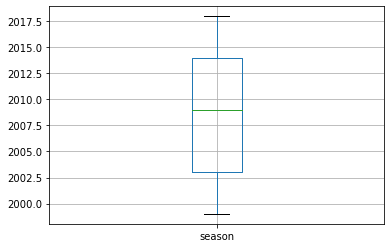

In [16]:
nhl_stats2.boxplot(column=['season'])

A boxplot is created for 'age', 'games_played', and 'goals', to reveal any significant outliers. No significant outliers indicated.

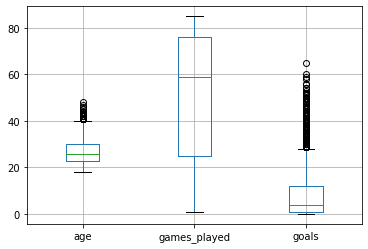

In [17]:
nhl_stats2.boxplot(column=['age', 'games_played', 'goals'])

A boxplot is created for 'goals_per_game' to reveal any significant outliers. Significant outlier indicated. More than 1 goal per game in a season is possible but unlikely. 

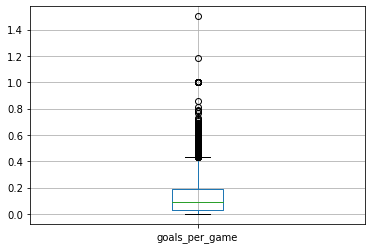

In [18]:
nhl_stats2.boxplot(column=['goals_per_game'])

A boxplot is created for 'assists', 'points', and 'shots' to reveal any significant outliers. No significant outliers indicated.

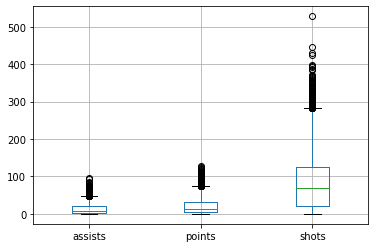

In [19]:
nhl_stats2.boxplot(column=['assists', 'points', 'shots'])

A boxplot is created for 'time_on_ice', 'blocks', and 'hits' to reveal any significant outliers. Significant outlier indicated. 0-50 minutes of ice time reveal players who played little to no games and cannot be used for analysis.

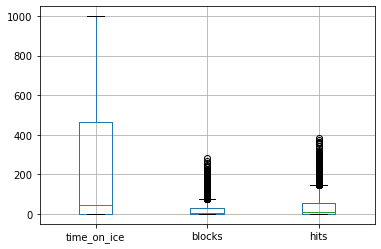

In [20]:
nhl_stats2.boxplot(column=['time_on_ice', 'blocks', 'hits'])

A boxplot is created for 'shot_percentage to reveal any significant outliers. Significant outlier indicated. 100% shot percentage in any given season of 82 games is virtually impossible. 

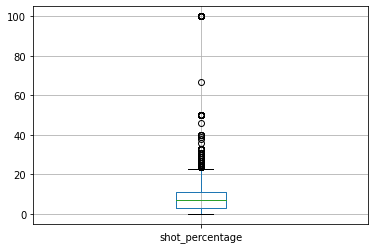

In [21]:
nhl_stats2.boxplot(column=['shot_percentage'])

Three outliers of concern were revealed by the boxplots above: 'goals_per_game', 'time_on_ice', and 'shot_percentage'. 
In any given season of 82 games, it is virtually impossible for any player to achieve 100% shot percentage, 1.5 goals per game, and/or 0-50 minutes of time on ice. Achieving these stats is only possible when playing a few games or a partial season, e.g., less than 25 games. For example, a player who plays only 3 games may earn 15 minutes of ice time and take 5 shots and score 5 goals, achieving a 100% shot percentage and an average of 1.67 goals per game. This is not realistic and virtually impossible for any player to achieve when playing an entire season of 82 games. From this, all players who played 25 or fewer games are removed from the dataframe to create a realistic standard of measure for all statistics earned. 

A variable and function are created to remove all players who played 25 or fewer games in any given season. 4034 rows are dropped.

In [22]:
nhl_stats2.shape #shape of dataframe before dropped players with 25 or fewer games_played - 16,071 rows
less_games = nhl_stats2[nhl_stats2.games_played <= 25] #variable that contains all players with 25 or fewer games_played
nhl_stats2.drop(less_games.index, inplace=True) #function that drops all players with 25 or fewer games_played
nhl_stats2.shape #shape of dataframe after dropping players with 25 or fewer games_played - 12,037 rows remain (4034 dropped)

(16071, 15)

(12037, 15)

A variable and function are created to remove all players with 50 minutes or less 'time_on_ice' in any given season. 6,775 are dropped.

In [23]:
nhl_stats2.shape #shape of dataframe after dropping players with 25 or fewer games played - 12,037 rows remain
less_time_on_ice = nhl_stats2[nhl_stats2.time_on_ice <= 50]
nhl_stats2.drop(less_time_on_ice.index, inplace=True)
nhl_stats2.shape #shape of dataframe after dropping players with 50 minutes or fewer time_on_ice - 5,262 rows remain (6,775 dropped)

(12037, 15)

(5262, 15)

'isnull().sum()' and 'shape' are used again to double-check that the dataframe has no missing values and total rows have been reduced from 12,037 to 5262 due to removal of players with 25 or fewer games played and 50 minutes or fewer time on ice.

In [24]:
nhl_stats2.isnull().sum() #double-checking dataframe still have no missing values
nhl_stats2.shape #double-checking dataframe rows have been reduced due to removal of players with 25 or fewer games played 
# and 50 minutes or fewer time on ice

season             0
player             0
age                0
team               0
position           0
games_played       0
goals              0
goals_per_game     0
assists            0
points             0
shots              0
shot_percentage    0
time_on_ice        0
blocks             0
hits               0
dtype: int64

(5262, 15)

A boxplot of 'goals_per_game' is checked again to ensure that no significant outliers of more than 1 goal per game remain after removal of players with 25 or fewer games played. The boxplot below of 'goals_per_game' confirms no significant outliers of more than 1 goal per game remain.

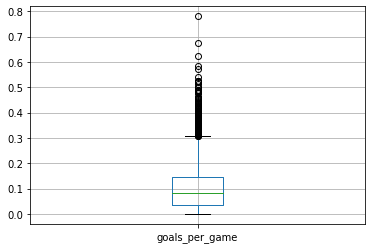

In [25]:
nhl_stats2.boxplot(column=['goals_per_game'])

A boxplot of 'time_on_ice' is checked again to ensure that no significant outliers of 0-50 minutes per game remain after removal of players with 50 minutes or fewer played. The boxplot below of 'time_on_ice' reveals no significant outliers of 0-50 minutes per game remain.

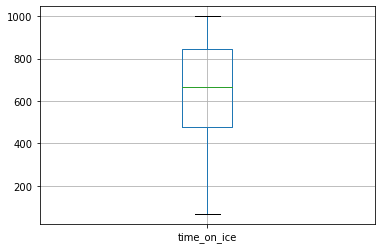

In [26]:
nhl_stats2.boxplot(column=['time_on_ice'])

A boxplot of 'shot_percentage' is checked again to ensure that no significant outliers of 100% shot percentage in any given season remain after removal of players with 25 or fewer games played. The boxplot below of 'shot_percentage' reveals no significant outliers of 100% shot percentage per season remain.

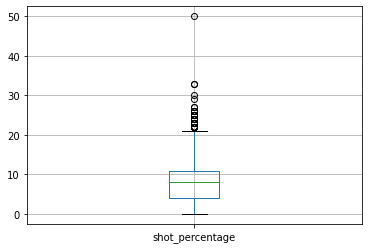

In [27]:
nhl_stats2.boxplot(column=['shot_percentage'])

Cleaned data is ready for further analysis. The following columns have been removed due to irrelevance of the data project: ‘unnamed: 0’, ‘+/-‘, ‘pim’, ‘evg’, ‘ppg’, ‘shg’, ‘gwg’, ‘eva’, ‘ppa’, ‘sha’, ‘atoi’, ‘fowin’, ‘foloss’, ‘fo%’. The following columns remain: 'season', 'player', 'age', 'team', 'position', 'games_played', 'goals', 'goals_per_game', 'assists', 'points', 'shots', 'shot_percentage', 'time_on_ice', 'blocks', and 'hits'. All rows with missing values, except in columns 'blocks' and 'hits', have been removed. All columns have been converted to correct data types and '0' is used to fill remaining missing numeric values, including in columns 'blocks' and 'hits'. Significant outliers were uncovered in 'goals_per_game', 'time_on_ice', and 'shot_percentage'. All 'players' with 25 or fewer 'games_played' and 50 or fewer minutes 'time_on_ice' were removed to create a realistic standard of measure for all statistics earned. In the beginning, there were 37,825 rows and 29 columns with several missing values and significant outliers. After data cleaning, 5,262 rows, 15 columns, and no missing values and no significant outliers remain. A total of 32,563 rows were eliminated.

In [28]:
nhl_stats2.shape
nhl_stats2.isnull().sum()
nhl_stats2.info()

(5262, 15)

season             0
player             0
age                0
team               0
position           0
games_played       0
goals              0
goals_per_game     0
assists            0
points             0
shots              0
shot_percentage    0
time_on_ice        0
blocks             0
hits               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5262 entries, 1 to 16486
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           5262 non-null   int64  
 1   player           5262 non-null   object 
 2   age              5262 non-null   int32  
 3   team             5262 non-null   object 
 4   position         5262 non-null   object 
 5   games_played     5262 non-null   int64  
 6   goals            5262 non-null   int32  
 7   goals_per_game   5262 non-null   float64
 8   assists          5262 non-null   int32  
 9   points           5262 non-null   int32  
 10  shots            5262 non-null   int64  
 11  shot_percentage  5262 non-null   float64
 12  time_on_ice      5262 non-null   float64
 13  blocks           5262 non-null   int32  
 14  hits             5262 non-null   int32  
dtypes: float64(3), int32(6), int64(3), object(3)
memory usage: 534.4+ KB


In [29]:
nhl_stats2.to_csv('nhl_stats_cleaned_data_phase1.csv',index=False)

# EDA Phase 2

<div class="alert alert-block alert-info"><b>Analysis</b></div>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [31]:
df = pd.read_csv('nhl_stats_cleaned_data_phase1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           5262 non-null   int64  
 1   player           5262 non-null   object 
 2   age              5262 non-null   int64  
 3   team             5262 non-null   object 
 4   position         5262 non-null   object 
 5   games_played     5262 non-null   int64  
 6   goals            5262 non-null   int64  
 7   goals_per_game   5262 non-null   float64
 8   assists          5262 non-null   int64  
 9   points           5262 non-null   int64  
 10  shots            5262 non-null   int64  
 11  shot_percentage  5262 non-null   float64
 12  time_on_ice      5262 non-null   float64
 13  blocks           5262 non-null   int64  
 14  hits             5262 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 616.8+ KB


,season,player,age,team,position,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits
0,2018,Pontus Aberg,24,TOT,LW,53,4,0.0755,12,16,70,6.0,645.0,8,24
1,2018,Noel Acciari,26,BOS,C,60,10,0.1667,1,11,66,15.0,775.0,41,152
2,2018,Michael Amadio,21,LAK,C,37,4,0.1081,4,8,28,14.0,345.0,9,18
3,2018,Andy Andreoff,26,LAK,LW,45,3,0.0667,6,9,47,6.0,423.0,11,77
4,2018,Sven Andrighetto,24,COL,RW,50,8,0.1600,14,22,111,7.0,724.0,18,38


<div style="background-color:lightblue;">

## Seaborn pairplot findings
#### The purpose of the following Seaborn pairplots is to identify any signficant patterns and correlations, both positive or negative, between goals, assists, points, shots, games played, time-on-ice, hits, and blocks. The objective is to idenfity which offensive category may or may not correlate with earning more goals, assists, and points in a season.

- There is a high positive correlation between time-on-ice, shots, goals, assists, and points. This was expected because more time-on-ice increases players' opportunities to rack up offensive categories.

- Shots and Goals. It appears that increased shots lead to more goals scored, however there is no clear indication because players who record 150+ shots per season tally anywhere between 5-30 goals per season.

- Time-On-Ice and Goals. It appears that increased time-on-ice leads to more goals scored. For example, to hit the 10 goal mark, players played no less than 250 minutes; to hit the 20 goal mark, players played no less than 700 minutes, and so on.

- Time-On-Ice and Assists. It appears that increased time-on-ice leads to more assists earned. For example, to hit the 10 assist mark, players played no less than 300 minutes; to hit the 20 assist mark, players played no less than 500 minutes, and so on.

- Time-On-Ice and Points. It appears that increased time-on-ice leads to more points scored. For example, to hit the 20 points mark, players played no less than 400 minutes; to hit the 40 points mark, players played no less than 650 minutes, and so on.

- Games Played and Goals. It was expected that more games played lead to more goals scored. However, there is no pattern between the number of games played and goals scored. Nearly 100% of players who played 80 or more games in a season scored less than 20 goals a season.

- Games Played and Assists. It was also expected that more games played lead to more assists earned. However, there is no pattern between the number of games played and assists earned. In fact, players with the most assists per season averaged between 30-60 games per season whereas players who played 80 or more games per season averaged below 20 assists per season.

- Games Played and Points. It was also expected that more games played lead to higher points scored. However, there is no pattern between the number of games played and points scored. In fact, players with the most points per season averaged between 30-60 games per season whereas players who played 80 or more games a season averaged no more than 35 points per season.

- Games Played and Time-On-Ice. There appears to be a low correlation between games played and time-on-ice. This makes sense because players are given more ice time based on the probability that they will make a positive team impact thoughout the game. From this, it is common for players to play 1000 minutes per season after only 50 games based upon their expected positive contribution in each game.
    
</div>

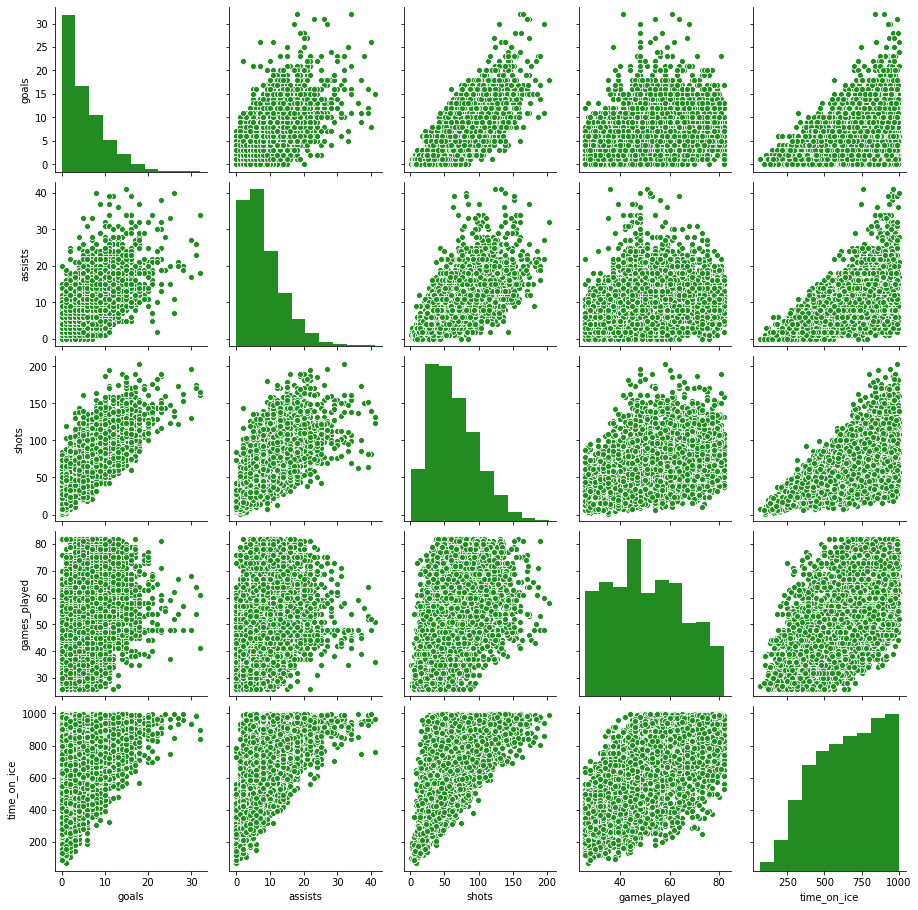

In [32]:
colors = ['forestgreen'] #creating a color variable
sns.set_palette(sns.color_palette(colors)) #setting the color palette for the pairplot
sns.pairplot(df[['goals', 'assists', 'shots', 'games_played','time_on_ice']])

<div style="background-color:lightblue;">

### Additional Seaborn pairplot findings regarding 'Season'
#### The purpose of using the additional Seaborn pairplots is to identify any signficant patterns and correlations between seasons and goals, assists, and points. The goal is to capture a time period which may have tallied more goals, assists, and points based on sweeping NHL rule changes that happened from 1999-2018.

- The 2005 season on the pairplot does not have offensive data because the season was cancelled due to a labor lockout, hence no data being recorded. This was intentionally left on the pairplot to identify any noticeable changes or patterns in goals, assists, and/or points before or after the lockout (the NHL Player's Association disputed the NHL's proposed salary cap on teams, which would ultimately impact the player's monetary contracts, and caused a league-wide lockout which eventually cancelled the 2005 season). 

- The most goals scored in a season happened from 2006-2011. This is very interesting because this comes off the cusp of the lockout, and the NHL changed league rules to favor offense during before the 2006 season commenced. For example, goaltenders were prohibited from handling the puck in new trapezoid-shaped zones behind the goal line, the overall size of goaltender equipment was reduced, two-line pass violations were eliminated, and offensive zones were enlarged. Source: https://records.nhl.com/history/historical-rule-changes. 

- The most assists earned in a season happened during 2000, 2006, and 2013. This is interesting because beginning in 2000, the NHL instituted a rule that all games must be played with the "two-referee system". This gave both linesmen and referees the power to call both penalties and line violations which may have diminished a player's ability to defend against offensive zone attacks. This also coincides with the NHL league rule changes that happened after the 2005 season league-wide lockout and before the start of the 2006 season. 

- The most points (goals and assists) scored in a season happened during 2000 and 2011. This coincides with the two-referee system implemented in 2000 and the rule changes that favored offense after the 2005 season lockout.

</div>

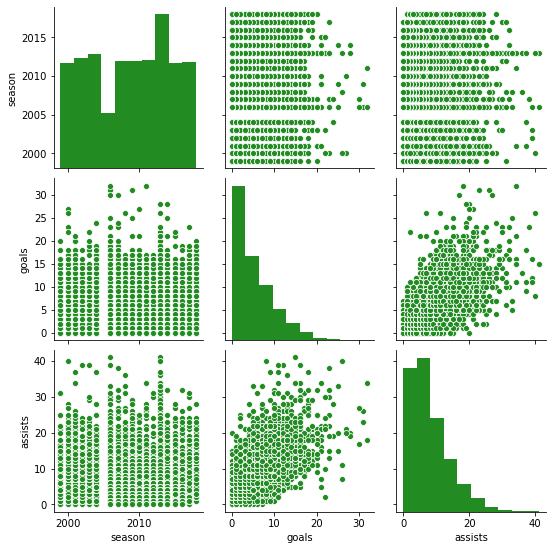

In [33]:
colors = ['forestgreen'] #creating a color variable
sns.set_palette(sns.color_palette(colors)) #setting the color palette for the pairplot
sns.pairplot(df[['season','goals','assists']])

<div style="background-color:lightblue;">

### Additional Seaborn pairplot findings regarding 'Blocks' and 'Hits'
#### The purpose of using the additional Seaborn pairplots is to identify any signficant patterns and correlations between goals, assists, hits, and blocks. The goal is to idenfity how blocks and hits may or may not correlate with goals and assists.

- Blocks, Goals, and Assists. It appears that more blocks earned are associated with fewer goals and assists scored. This suggests that blocks are more closely associated with defensive and/or 'enforcer' type players. This was expected.

- Hits, Goals, and Assists. Patterns suggest that more hits earned are associated with fewer goals and assists scored. This suggests that hits are more closely associated with defensive and/or 'enforcer' type players. This was expected.

- Blocks and Hits. More blocks earned are generally associated with fewer hits. This may suggest that blocks are more closely associated with defensive-minded players and hits may be more closely associated with 'enforcer' type players.

- Hits and Blocks. More hits earned are generally associated with fewer blocks. This reinforces the indication that hits may be more closely associated with 'enforcer' type players.
    
</div>

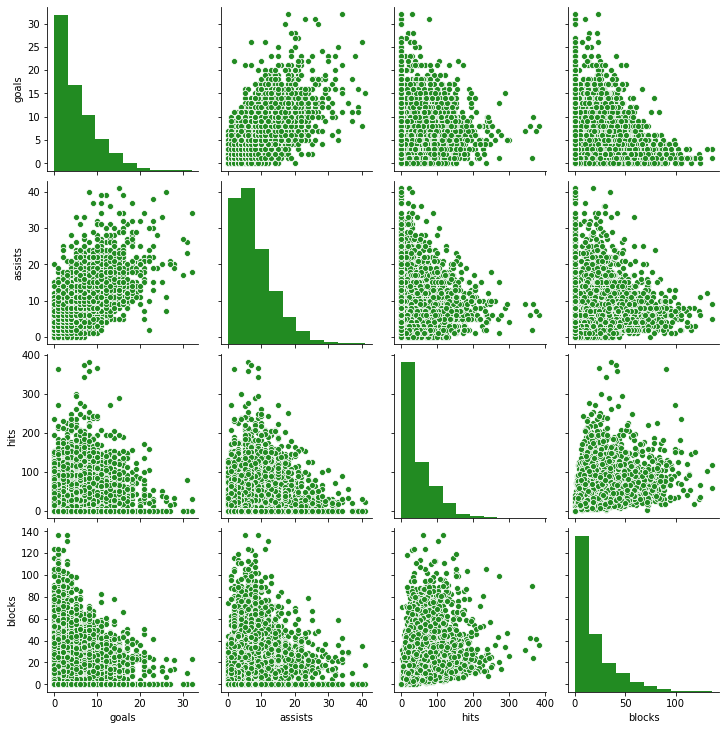

In [34]:
colors = ['forestgreen'] #creating a color variable
sns.set_palette(sns.color_palette(colors)) #setting the color palette for the pairplot
sns.pairplot(df[['goals','assists','hits','blocks']])

<div style="background-color:lightblue;">

### Additional Seaborn pairplot findings regarding 'Games Played', 'Time-On-Ice, 'Blocks', and 'Hits'
#### The purpose of using the additional Seaborn pairplots is to identify any signficant patterns and correlations between games played, time-on-ice, blocks, and hits. The goal is to idenfity how blocks and hits may or may not correlate with games played and time-on-ice.

- Games Played and Blocks. It appears that more games played do not lead to more blocks earned; this was not expected because more games played naturally gives a player more opportunities to earn more blocks.

- Time-On-Ice and Blocks. It appears that more time-on-ice leads to more blocks earned. This was expected and reinforces the pairplot findings above that more games played does not simply lead to more time-on-ice because players are given ice time based on their potential to make a positive impact for the team. 

- Hits and Games Played. More hits are associated with more games played. This makes sense given the physical nature of the game that demands hits almost every shift.

- Hits and Time-On-Ice. It appears that more time-on-ice leads to more hits earned. This was expected and reinforces the pairplot findings above that more games played does not simply lead to more time-on-ice because players are given ice time based on their potential to make a positive impact for the team. 

- Hits and Blocks. Both hits and blocks trend upward as a player spends more time-on-ice. This was expected and reinforces the pairplot findings above that more time-on-ice increases a players opportunities to rack up offensive categories. 
    
</div>

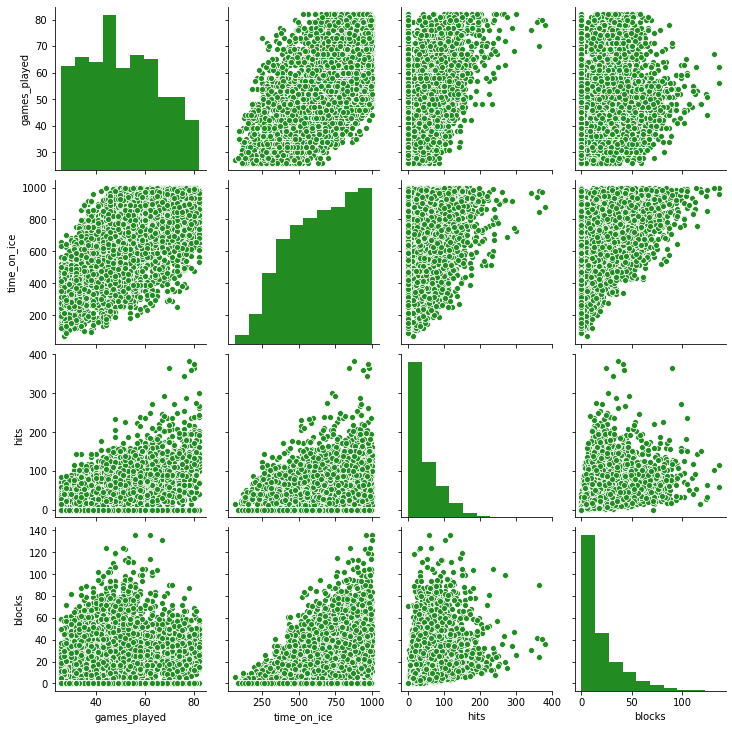

In [35]:
colors = ['forestgreen'] #creating a color variable
sns.set_palette(sns.color_palette(colors)) #setting the color palette for the pairplot
sns.pairplot(df[['games_played','time_on_ice','hits','blocks']])

<div style="background-color:lightblue;">
    
### Seaborn Heatmap Correlation Results
    
It makes sense that goals, assists, points, shots, and shot percentage are highly positively correlated as goals cannot be scored without players taking a shot. The positive correlation between goals and assists makes sense because players who score a lot of goals typically earn a lot of assists by the very nature of playing with other goal scorers. Conversely, players who earn a lot of assists typically earn more goals by the very nature of playing with other goal scorers; points are simply the combined total of goals and assists. 
    
It is somewhat surprising that goals, assists, and shots are mildly correlated with the number of games played and time-on-ice. However, it ultimately makes sense because high shots, goals, and assists are essentially outliers in the overall data because the minority of players achieve higher shots, goals, and assists. In other words, it is common for most players to play an entire season of 82 games and take very few shots, and score very few goals and assists, if any at all; the players achieve high statistics in these categories are typically considered 'star' players.
    
Although a younger age generally suggests a more agile offensive performance on the ice, it makes sense that age has a low negative correlation and very low positive correlation with every offensive category because age has never been directly correlated with offensive categories in real hockey. In other words, successful offensive players range from 18-47 years of age. 

</div>

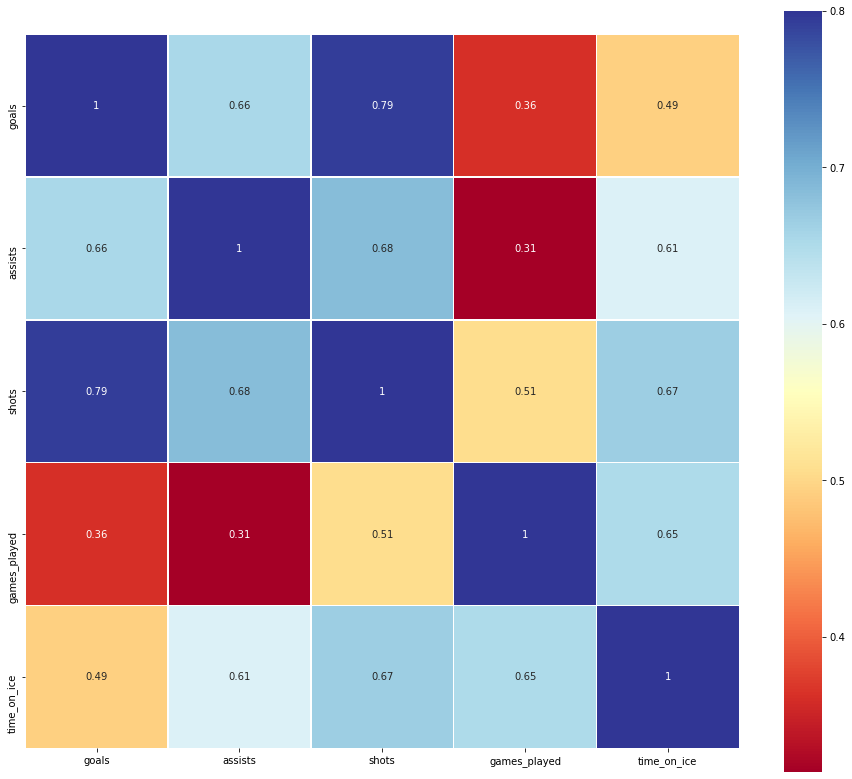

In [36]:
#creating variables of the df columns to provide correlations using a seaborn heatmap
columns = ['goals','assists','shots','games_played','time_on_ice']
df_corr = df[columns]

corrmat = df_corr.corr()

f, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5)

<div style="background-color:lightblue;">
    
### Same seaborn heatmap cut in half for easier visualization
    
</div>

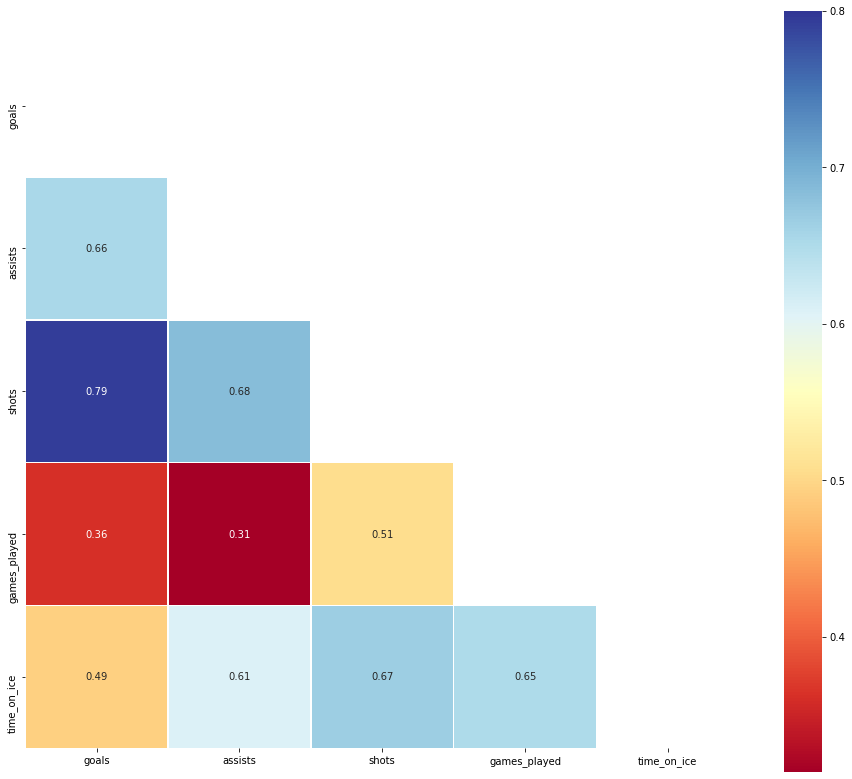

In [37]:
#same seaborn heatmap cut in half for easier visualization
columns = ['goals','assists','shots','games_played','time_on_ice']
df_corr = df[columns]

corrmat = df_corr.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))

f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corrmat, vmax=.8, square=True, mask=mask, annot=True, cmap='RdYlBu', linewidths=.5)

<div style="background-color:lightblue;">

### Average number of goals scored each season
5.32 goals per season over a 21 year period is not a lot by any means. This suggests that high goal scorers are actually outliers in the NHL.
    
</div>

In [38]:
#average number of goals scored each season
averagegoals = df['goals'].mean()
print(f'The average number of goals scored per season from 1999 - 2018 is {round(averagegoals, 2)} goals')

The average number of goals scored per season from 1999 - 2018 is 5.32 goals


<div style="background-color:lightblue;">
    
### Average player age
This makes sense since players' age typically range between 18-47 years of age.
    
</div>

In [39]:
#average age of player
averageage = df['age'].mean()
print(f'The average age from 1999 - 2018 is {round(averageage)} years old')

The average age from 1999 - 2018 is 27 years old


<div style="background-color:lightsteelblue;">
  
## Matplotlib Plotly Pie Charts
- The following pie charts are intentionally displayed individually, instead of configured on a 3x3 subplot, in order to analyze each offensive category separately with its corresponding data.
    
</div>

<div style="background-color:lightblue;">
    
### Total Number of Positions Represented with Matplotlib Plotly Pie Chart
Centers (C) have the highest number of positions filled with Defenseman (D) a close second. For the most part, all positions are evenly spread out. 
    
</div>

In [40]:
#total number of players in each position
df['position'].count()
df['position'].value_counts()

5262

 C         1462
 D         1364
 LW        1217
 RW        1214
 C/LW         2
 LW/C         1
 LW/D         1
 LW/RW        1
Name: position, dtype: int64

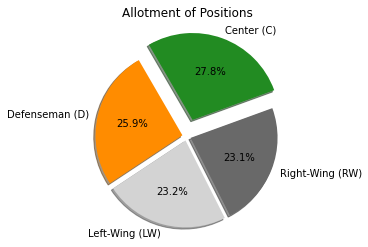

<Figure size 432x288 with 0 Axes>

In [41]:
#plotly pie chart for visualization of total number of positions represented. Mixed positions left off for lack of significant numbers.
Positions = [1462,1364,1217,1214] #number of goals of each position in order from greatest to least
my_labels = 'Center (C)','Defenseman (D)','Left-Wing (LW)','Right-Wing (RW)' #labels for each portion of the pie. Mixed positions are left off for lack of significant numbers
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of largest portion of positions
plt.pie(Positions, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Allotment of Positions') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">

### Total Goals Scored Breakdown by Position with Matplotlib Pyplot Pie Chart
    
Centers (C) scored the most goals, followed by RWs, LWs, and D. My initial hunch was that Left Wing (LW) or Right Wing (RW) positions would score the most goals. This indicates that Centers (C) are arguably the most offensive minded players on a team.
    
</div>

In [42]:
#total goals scored by each position
goals_by_position = df.groupby(['position']).goals.sum().reset_index()
print(goals_by_position)

  position  goals
0       C    9560
1    C/LW      12
2       D    2470
3      LW    7920
4    LW/C       4
5    LW/D       5
6   LW/RW       1
7      RW    8048


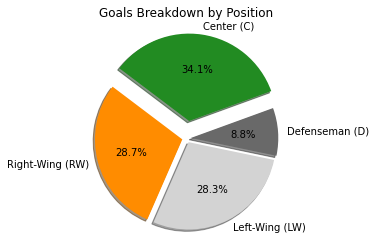

<Figure size 432x288 with 0 Axes>

In [43]:
#plotly pie chart for visualization of total goals scored by position

Goals = [9560,8048,7920,2470] #number of goals of each position in order from greatest to least. Mixed positions left off for lack of significant numbers.

my_labels = 'Center (C)','Right-Wing (RW)','Left-Wing (LW)','Defenseman (D)' #labels for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of largest portion of goals
plt.pie(Goals, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Goals Breakdown by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">
    
### Total Assists Earned Breakdown by Position with Matplotlib Plotly Pie Chart
    
Centers (C) earned the most assists out of any position from 1999-2018. This confirmed my hunch that Centers (C) earn the most assists based upon the nature of the position. This further indicates that Centers (C) are arguably the most valuable offensive contributor on a team.
    
</div>

In [44]:
#total assists earned by each position
assists_by_position = df.groupby(['position']).assists.sum()
print(assists_by_position)

position
 C         14446
 C/LW         12
 D          8379
 LW        10445
 LW/C          4
 LW/D          7
 LW/RW         0
 RW        10655
Name: assists, dtype: int64


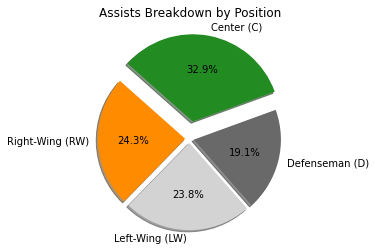

<Figure size 432x288 with 0 Axes>

In [45]:
#plotly pie chart for visualization of total assists earned by position. Mixed positions left off for lack of significant numbers.

Assists = [14446,10655,10445,8379] #number of assists of each position from greatest to least
my_labels = 'Center (C)','Right-Wing (RW)','Left-Wing (LW)','Defenseman (D)' #label for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of of largest portion of assists
plt.pie(Assists, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Assists Breakdown by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">

### Total Points Scored Breakdown by Position with Matplotlib Plotly Pie Chart
    
It appears that Centers (C) are the most valuable offensive position on a team because Centers (C) have scored more points than any other position from 1999-2018.
    
</div>

In [46]:
#total points scored by each position
points_by_position = df.groupby(['position']).points.sum().reset_index()
print(points_by_position)

  position  points
0       C    24006
1    C/LW       24
2       D    10849
3      LW    18365
4    LW/C        8
5    LW/D       12
6   LW/RW        1
7      RW    18703


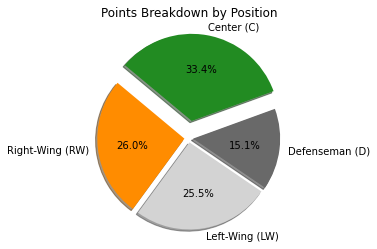

<Figure size 432x288 with 0 Axes>

In [47]:
# plotly pie chart for visualization of total points earned by position. Mixed positions left off for lack of significant numbers.

points = [24006, 18703, 18365, 10849] #number of points of each position from greatest to least
my_labels = 'Center (C)','Right-Wing (RW)','Left-Wing (LW)','Defenseman (D)' #label for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of of largest portion of points
plt.pie(points, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Points Breakdown by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">

### Total Games Played Breakdown by Position with Matplotlib Plotly Pie Chart
    
Centers (C) played the most games thus indicating that Centers (C) are the most valuable position on a team.
    
</div>

In [48]:
#total games played by each position
games_played_by_position = df.groupby(['position']).games_played.sum().reset_index()
print(games_played_by_position)

  position  games_played
0       C          77338
1    C/LW            108
2       D          59694
3      LW          65435
4    LW/C             39
5    LW/D             64
6   LW/RW             29
7      RW          65487


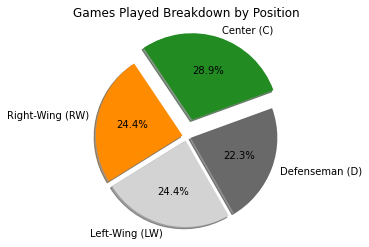

<Figure size 432x288 with 0 Axes>

In [49]:
# plotly pie chart for visualization of total games played by position. Mixed positions left off for lack of significant numbers.

games_played = [77338, 65487, 65435, 59694] #number of games played of each position from greatest to least
my_labels = 'Center (C)','Right-Wing (RW)','Left-Wing (LW)','Defenseman (D)' #label for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of of largest portion of games played
plt.pie(games_played, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Games Played Breakdown by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">

### Total Shots Breakdown by Position with Matplotlib Plotly Pie Chart
    
Centers (C) take the most shots, followed by RW, LW, and D. This appears to suggest that Centers (C) are the most offensive minded position on a team.
    
</div>

In [50]:
#total shots taken by each position 
shots_by_position = df.groupby(['position']).shots.sum().reset_index() 
print(shots_by_position)

  position   shots
0       C   101592
1    C/LW      168
2       D    56284
3      LW    84332
4    LW/C       36
5    LW/D       60
6   LW/RW       35
7      RW    87505


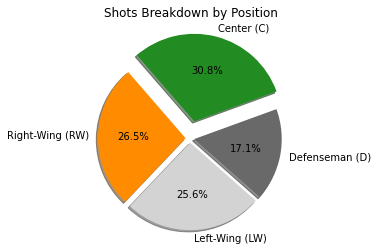

<Figure size 432x288 with 0 Axes>

In [51]:
# plotly pie chart for visualization of total shots by position. Mixed positions left off for lack of significant numbers.

shots = [101592, 87505, 84332, 56284] #number of shots of each position from greatest to least
my_labels = 'Center (C)','Right-Wing (RW)','Left-Wing (LW)','Defenseman (D)' #label for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of of largest portion of shots
plt.pie(shots, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Shots Breakdown by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">

### Total Time-On-Ice by Position with Matplotlib Plotly Pie Chart
    
Centers (C) rack up the most time on ice compared to all other positions. This makes sense since Centers (C) come out on top in all other offensive categories. This appears to confirm that Centers (C) are the most valuable position on a team.
    
</div>

In [52]:
#total time-on-ice accrued by each position
toi_by_position = df.groupby(['position']).time_on_ice.sum().reset_index()
print(toi_by_position)

  position  time_on_ice
0       C      977123.0
1    C/LW        1307.0
2       D      935001.0
3      LW      753684.0
4    LW/C         423.0
5    LW/D         786.0
6   LW/RW         308.0
7      RW      755857.0


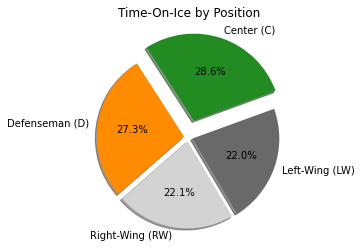

<Figure size 432x288 with 0 Axes>

In [53]:
# plotly pie chart for visualization of total time-on-ice by position. Mixed positions left off for lack of significant numbers.

time_on_ice = [977123, 935001, 755857, 753684] #total time-on-ice of each position from greatest to least
my_labels = 'Center (C)','Defenseman (D)','Right-Wing (RW)','Left-Wing (LW)' #label for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of of largest portion of total time-on-ice
plt.pie(time_on_ice, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Time-On-Ice by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">

### Total Blocks by Position with Matplotlib Plotly Pie Chart

Defenseman (D) earn the most blocks by nearly a 2 to 1 margin. This makes sense because the defenseman (D) position by nature is to defend against offensive attacks, specifically against shots. This also supports the positive correlations from the Seaborn pairplots above that blocks are more closely associated with defensive and/or 'enforcer' type positions. It is interesting to note that players who play multiple positions (e.g., C/LW, LW/D, LW/C, LW/RW) do not earn a significant amount of blocks. This may suggest that players assigned multiple positions may be encharged with unique responsibilities traditionally not associated with each position.
    
</div> 

In [54]:
#total blocks tallied by each position
blocks_by_position = df.groupby(['position']).blocks.sum().reset_index()
print(blocks_by_position)

  position  blocks
0       C    22069
1    C/LW       47
2       D    41937
3      LW    13614
4    LW/C       20
5    LW/D        0
6   LW/RW        9
7      RW    12894


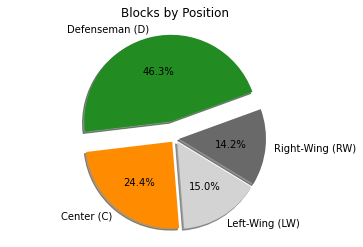

<Figure size 432x288 with 0 Axes>

In [55]:
# plotly pie chart for visualization of total blocks by position. Mixed positions left off for lack of significant numbers.

blocks = [41937, 22069, 13614, 12894] #total blocks of each position from greatest to least
my_labels = 'Defenseman (D)', 'Center (C)','Left-Wing (LW)','Right-Wing (RW)' #label for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of of largest portion of total blocks
plt.pie(blocks, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Blocks by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">

### Total Hits by Position with Matplotlib Plotly Pie Chart
    
Centers (C) record the most hits followed by LW, RW, and D. Although my hunch was that Centers (C) was one of the positions to record the highest number of hits given the rough nature of its position, it is surprising to see Defensemen (D) with the least amount of hits given the rough nature of the defensive/'enforcer' type position to defend against offensive attacks in the defensive zone. However, this may suggest that 'enforcer' type players are more often assigned offensive-type positions like Center (C), Right-Wing (RW), or Left-Wing (LW) in order to enhance a Defenseman's (D) ability to focus solely on blocks and defense. It is interesting to note that players who play multiple positions (e.g., C/LW, LW/D, LW/C, LW/RW) do not earn a significant amount of hits. This reinforces the idea that players who are assigned multiple positions may be encharged with unique responsibilities traditionally not associated with each position.
    
</div>

In [56]:
#total hits tallied by each position
hits_by_position = df.groupby(['position']).hits.sum().reset_index()
print(hits_by_position)

  position   hits
0       C   57917
1    C/LW     147
2       D   46617
3      LW   52984
4    LW/C      22
5    LW/D       0
6   LW/RW      21
7      RW   52050


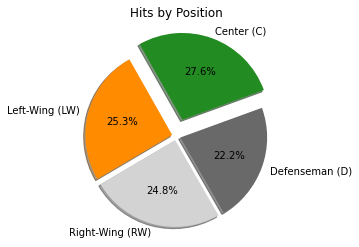

<Figure size 432x288 with 0 Axes>

In [57]:
# plotly pie chart for visualization of total hits by position. Mixed positions left off for lack of significant numbers.

hits = [57917, 52984, 52050, 46617] #total hits of each position from greatest to least
my_labels = 'Center (C)','Left-Wing (LW)','Right-Wing (RW)','Defenseman (D)' #label for each portion of the pie
my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of of largest portion of total hits
plt.pie(hits, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) #putting the pie chart together from the variables created above
plt.title('Hits by Position') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

<div style="background-color:lightblue;">
    
## Seaborn Boxplot (results below)
    
</div>

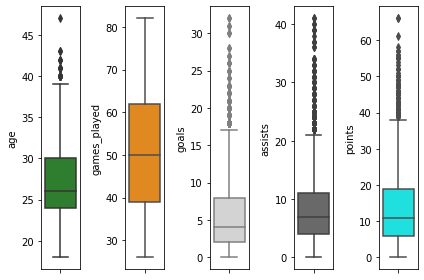

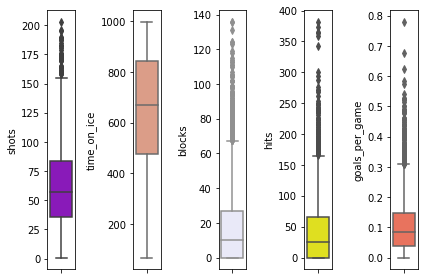

In [58]:
f, axes = plt.subplots(1,5)
plt.figsize=(10,20)
sns.boxplot(df['age'], orient = 'v', color = 'forestgreen', ax = axes[0])
sns.boxplot(df['games_played'], orient = 'v', color = 'darkorange', ax = axes[1])
sns.boxplot(df['goals'], orient = 'v', color = 'lightgray', ax = axes[2])
sns.boxplot(df['assists'], orient = 'v', color = 'dimgrey', ax = axes[3])
sns.boxplot(df['points'], orient = 'v', color = 'aqua', ax = axes[4])

plt.tight_layout()

f, axes = plt.subplots(1,5)
plt.figsize=(10,20)
sns.boxplot(df['shots'], orient = 'v', color = 'darkviolet', ax = axes[0])
sns.boxplot(df['time_on_ice'], orient = 'v', color = 'darksalmon', ax = axes[1])
sns.boxplot(df['blocks'], orient = 'v', color = 'lavender', ax = axes[2])
sns.boxplot(df['hits'], orient = 'v', color = 'yellow', ax = axes[3])
sns.boxplot(df['goals_per_game'], orient = 'v', color = 'tomato', ax = axes[4])
plt.tight_layout()

<div style="background-color:lightblue;">

## Seaborn Boxplots Results

With the exception of 'Games Played' and 'Time-On-Ice', every offensive category has outliers. However, this is normal because every season produces a group of players who achieve superior offensive statistics compared to the overwhelming majority of players who typically achieve subpar offensive statistics. 

- The few outliers on Age are accurate as several players have played past the age of 40.
- The outliers on Goals are accurate as several players score 17 or more goals every season.
- The outliers on Assists are accurate as several players earn 21 or more assists every season.
- The outliers on Points are accurate as several players earn 38 or more points every season.
- The outliers on Shots are accurate as several players tally 150 or more shots every season.
- The outliers on Blocks are accurate as several players earn 60-140 blocks every season.
- The outliers on Hits are accurate as several players range between 160-400 hits every season.
- The outliers on Goals Per Game are accurate as several players score enough goals every season to average 0.3 or more goals per game.
    
</div>

In [59]:
#adding a column to the dataframe to evaluate goals data based upon player rankings of the amount of goals scored.
#result of group rankings findings below

df['goalsRank'] = df['goals'].rank(method='max') #adding column to the dataframe to store a player's ranking based upon the number of goals scored.

from pandas import Categorical

top_cat = 5161 #category 1 (or Group 1) will be players who rank higher than 5161 
low_cat = 5000 #category 2 (or Group 3) will be players who rank higher than 5000 (Group 3 will be players who rank lower than Groups 1 and 2)

df['goalsCat'] = Categorical(np.where(df['goalsRank'] > top_cat,1,2)) #category 1 (or Group 1) will be players who rank higher than 5161, category 2 (or Group 3) will be players who rank higher than 5000 
df['goalsCat'] = Categorical(np.where(df['goalsRank'] < low_cat,3,df['goalsCat'])) #Group 3 will be players who rank lower than Groups 1 and 2
df.head(140) #confirming the results of the newly added categories

,season,player,age,team,position,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits,goalsRank,goalsCat
0,2018,Pontus Aberg,24,TOT,LW,53,4,0.0755,12,16,70,6.0,645.0,8,24,2786.0,3
1,2018,Noel Acciari,26,BOS,C,60,10,0.1667,1,11,66,15.0,775.0,41,152,4552.0,3
2,2018,Michael Amadio,21,LAK,C,37,4,0.1081,4,8,28,14.0,345.0,9,18,2786.0,3
3,2018,Andy Andreoff,26,LAK,LW,45,3,0.0667,6,9,47,6.0,423.0,11,77,2288.0,3
4,2018,Sven Andrighetto,24,COL,RW,50,8,0.1600,14,22,111,7.0,724.0,18,38,4128.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2018,Ryan Kesler,33,ANA,C,44,8,0.1818,6,14,78,10.0,794.0,38,71,4128.0,3
136,2018,Jujhar Khaira,23,EDM,LW,69,11,0.1594,10,21,73,15.0,877.0,39,128,4702.0,3
137,2018,Slater Koekkoek,23,TBL,D,35,4,0.1143,4,8,43,9.0,393.0,24,36,2786.0,3
138,2018,Chris Kreider,26,NYR,LW,58,16,0.2759,21,37,137,12.0,906.0,24,103,5132.0,2


In [60]:
#displaying the grouped data to analyze how each categorical group correlates with each offensive category
#results of group rankings findings below
df.groupby('goalsCat').describe().transpose().head(48)
df.groupby('goalsCat').describe().transpose().tail(56)

goalsCat                        1            2            3
season         count   130.000000   217.000000  4915.000000
               mean   2009.269231  2009.290323  2008.774364
               std       5.233743     5.283933     5.812614
               min    1999.000000  1999.000000  1999.000000
               25%    2006.000000  2006.000000  2003.000000
               50%    2009.000000  2009.000000  2009.000000
               75%    2013.000000  2013.000000  2013.000000
               max    2018.000000  2018.000000  2018.000000
age            count   130.000000   217.000000  4915.000000
               mean     26.215385    26.894009    27.030112
               std       4.275375     4.898300     4.493869
               min      19.000000    18.000000    18.000000
               25%      23.000000    23.000000    24.000000
               50%      25.500000    26.000000    26.000000
               75%      28.750000    30.000000    30.000000
               max      39.000000    40.000000    47.000000
games_played   count   130.000000   217.000000  4915.000000
               mean     57.476923    58.387097    50.468362
               std      11.186381    11.306235    14.869202
               min      35.000000    35.000000    26.000000
               25%      48.000000    48.000000    38.000000
               50%      56.500000    58.000000    49.000000
               75%      65.750000    67.000000    62.000000
               max      82.000000    81.000000    82.000000
goals          count   130.000000   217.000000  4915.000000
               mean     20.176923    14.751152     4.515972
               std       3.609774     0.789287     3.501308
               min      17.000000    14.000000     0.000000
               25%      18.000000    14.000000     2.000000
               50%      19.000000    15.000000     4.000000
               75%      21.000000    15.000000     7.000000
               max      32.000000    16.000000    13.000000
goals_per_game count   130.000000   217.000000  4915.000000
               mean      0.365497     0.262933     0.088836
               std       0.100949     0.056764     0.068431
               min       0.207300     0.172800     0.000000
               25%       0.284425     0.218800     0.034500
               50%       0.354200     0.250000     0.076900
               75%       0.422625     0.301900     0.130400
               max       0.780500     0.457100     0.481500
assists        count   130.000000   217.000000  4915.000000
               mean     18.630769    17.115207     7.693184
               std       7.164878     6.339953     5.402695
               min       2.000000     5.000000     0.000000
               25%      14.000000    13.000000     4.000000
               50%      18.000000    16.000000     7.000000
               75%      22.000000    21.000000    10.000000
               max      40.000000    41.000000    40.000000

goalsCat                         1            2            3
points          count   130.000000   217.000000  4915.000000
                mean     38.807692    31.866359    12.209156
                std       8.876496     6.478284     7.990646
                min      24.000000    19.000000     0.000000
                25%      32.000000    27.000000     6.000000
                50%      37.000000    31.000000    11.000000
                75%      44.000000    35.000000    17.000000
                max      66.000000    56.000000    51.000000
shots           count   130.000000   217.000000  4915.000000
                mean    133.953846   116.391705    58.462055
                std      26.090439    25.230943    29.922297
                min      74.000000    60.000000     1.000000
                25%     117.250000    99.000000    35.000000
                50%     133.000000   115.000000    54.000000
                75%     149.000000   132.000000    78.000000
                max     203.000000   189.000000   195.000000
shot_percentage count   130.000000   217.000000  4915.000000
                mean     15.461538    13.350230     7.332045
                std       2.973146     3.154496     4.640431
                min       9.000000     7.000000     0.000000
                25%      13.250000    11.000000     4.000000
                50%      15.000000    13.000000     7.000000
                75%      17.000000    15.000000    10.000000
                max      23.000000    27.000000    50.000000
time_on_ice     count   130.000000   217.000000  4915.000000
                mean    889.292308   861.023041   635.206307
                std      94.374517    97.274118   219.260313
                min     565.000000   551.000000    67.000000
                25%     838.500000   804.000000   461.000000
                50%     919.000000   885.000000   645.000000
                75%     961.750000   941.000000   824.000000
                max     999.000000   999.000000   999.000000
blocks          count   130.000000   217.000000  4915.000000
                mean     13.092308    14.156682    17.460020
                std      14.157720    14.362160    21.946112
                min       0.000000     0.000000     0.000000
                25%       0.000000     0.000000     0.000000
                50%      12.000000    13.000000    10.000000
                75%      23.000000    24.000000    28.000000
                max      51.000000    78.000000   136.000000
hits            count   130.000000   217.000000  4915.000000
                mean     35.823077    42.442396    39.855748
                std      43.753975    49.496892    48.745764
                min       0.000000     0.000000     0.000000
                25%       0.000000     0.000000     0.000000
                50%      23.000000    29.000000    25.000000
                75%      55.750000    66.000000    66.000000
                max     172.000000   288.000000   382.000000
goalsRank       count   130.000000   217.000000  4915.000000
                mean   5206.361538  5063.064516  2679.132859
                std      31.906356    47.153762  1337.281295
                min    5163.000000  5016.000000   502.000000
                25%    5192.000000  5016.000000  1796.000000
                50%    5203.000000  5085.000000  2786.000000
                75%    5230.000000  5085.000000  3835.000000
                max    5262.000000  5132.000000  4915.000000

In [61]:
df_groupby = df.drop('season', axis=1) #temporarily dropping the season column for this specific output because it is irrelevant to the analysis
df_groupby.groupby('goalsCat').mean() #displaying the mean of each offensive statistic for Groups 1, 2, and 3.
df_groupby.goalsCat.value_counts() #reveals how many players in each category

,age,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits,goalsRank
goalsCat,,,,,,,,,,,,
1,26.215385,57.476923,20.176923,0.365497,18.630769,38.807692,133.953846,15.461538,889.292308,13.092308,35.823077,5206.361538
2,26.894009,58.387097,14.751152,0.262933,17.115207,31.866359,116.391705,13.350230,861.023041,14.156682,42.442396,5063.064516
3,27.030112,50.468362,4.515972,0.088836,7.693184,12.209156,58.462055,7.332045,635.206307,17.460020,39.855748,2679.132859


3    4915
2     217
1     130
Name: goalsCat, dtype: int64

<div style="background-color:lightblue;">

## Result of Group Rankings
- Category 1, representing the top 130 goal scorers from 1999-2018, has the highest numbers in all offensive categories (goals_per_game, assists, points, shot, shot_percentage, and time_on_ice). 
- Age is very similar across Categories 1, 2, and 3 averaging around 26-27 years of age; Category 3 has the oldest players. This indicates that age is likely an insignificant factor with high goal scorers.
- Average number of games_played is highest in Category 2 with Category 1 slightly behind but only by a very slim margin; category 3 is noticeably lower. This indicates that more games played does not necessarily lead to more goals scored.
- Goals are significantly higher in Category 1 with max goals twice as much as Category 2.
- Naturally, goals_per_game is highest in Category 1 since goals are significantly higher in this category.
- Assists are highest in Category 1 with Category trailing close behind. Category 3 is significantly behind. This indicates that as more goals are scored, more assists are earned. This may be due to high goal scoring players playing with more offensive-minded players
- Points are much higher in Category 1. This was expected since Category 1 scores the most goals.
- Shots are noticeably higher in Category 1. This indicates that more shots lead to more goals scored. Coachs may want to give more ice time to players who shoot more often.
- Naturally, shot_percentage is highest in Category 1 since shots are significantly higher in this category. 
- Time_on_ice is highest in Category 1 with Category 3 much lower than both Category 1 and 2. This reinforces the idea that more time-on-ice is likely to lead to more scoring opportunities. From this, coachs may want to give more ice time to players who are likely to shoot more often.
- Blocks are much higher in Category 3. This may indicate that players who focus on blocking shots are more defensive-minded and should thus not be a determining factor when building a lineup.
- Hits are highest in Category 2, followed by Category 3, then 1. This may illustrate that hits are not a focal point of offensive-minded players and coaches should not pressure high goal scorer to be more physical than necessary to avoid injury.    
    
</div>

<div style="background-color:lightblue;">

## Pairplot Results Looking at Goals Data with Assists, Points, and Games Played
    
The pairplot color comparison is based upon the Goals Category. Group 1 (blue) has the highest goals scored per season, Group 2 (orange) has the 2nd highest goals scored per season, and Group 3 (green) has the least amount of goals scored per season.
The purpose of this pairplot is to identify where the top goal scorers stand regarding assists, points, and games played, and to identify any signficant correlations.
    
- Each row of plots reveals that Group 1, 2 and 3 are widespread among the amount of assists and points earned, and games played. From this, there is no clear indication that more goals lead to more assists, points, and that more games played lead to more goals scored. 
    
</div>

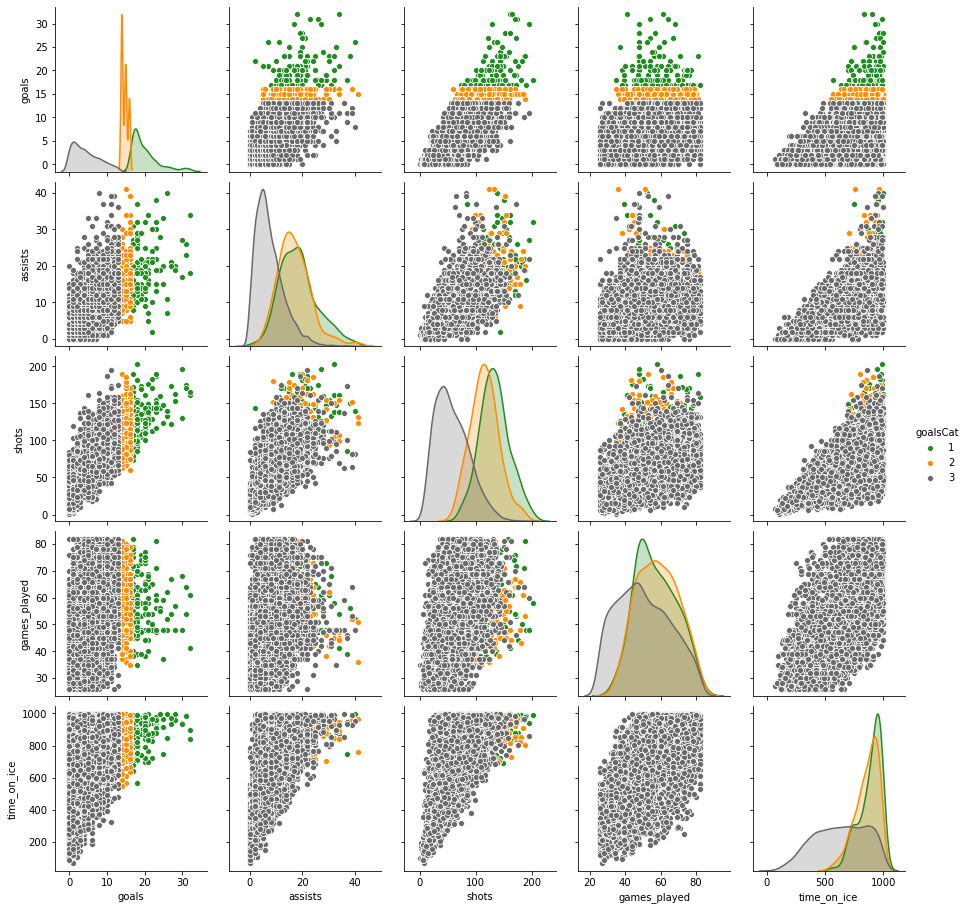

In [62]:
my_colors = ['forestgreen','darkorange','dimgrey','dimgrey'] #variable of colors for pairplot to maintain consistent color throughout project
sns.pairplot(df, hue='goalsCat', vars=['goals','assists','shots','games_played','time_on_ice'], palette=my_colors)

<div style="background-color:lightblue;">

## Pairplot Results Looking at Goals Data with Shots, Shot Percentage, and Time-On-Ice
    
The pairplot color comparison is based upon the Goals Category. Group 1 (blue) has the highest goals scored per season, Group 2 (orange) has the 2nd highest goals scored per season, and Group 3 (green) has the least amount of goals scored per season.
The purpose of this pairplot is to identify where the top goal scorers stand regarding shots, shot percentage, and time-on-ice, and to identify any significant correlations.
    
- Each row of this pairplot reveals that a higher number of goals mostly correlates with a higher number of shots, higher shot percentage, and more time-on-ice. From this, coaches may want to strategize around increased shots instead of the trying to build the 'perfect' scoring opportunity.
- Row 1 shows that Groups 1 and 2 are, for the most part, evenly spread out among shots, shot percentage, and time-on-ice. However, it interesting to note that row 1 has triangular/trapezoid shaped pairplots; this reveals an upward trend for Group 1 in these categories. In other words, as more goals are scored, the number of shots taken and shot percentage gradually increase, and more time-on-ice is accrued. This reinfornces the concept that as more shots are taken, more goals are scored. From this, coaches may want to encourage players to throw the puck on the net as much as possible instead of trying to create a 'perfect' play. 
    
</div>

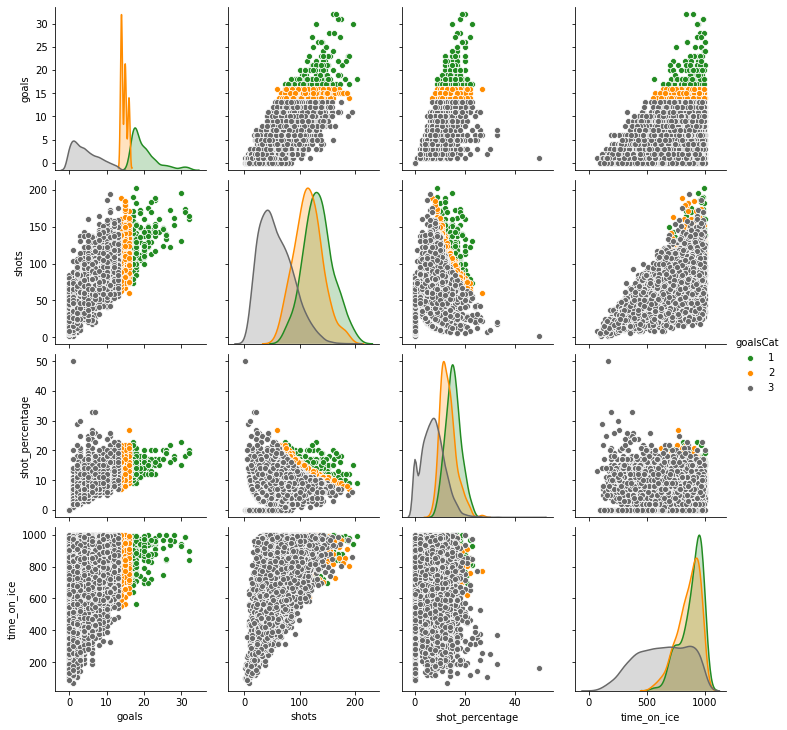

In [63]:
my_colors = ['forestgreen','darkorange','dimgrey','dimgrey'] #variable of colors for pairplot to maintain consistent color throughout project
sns.pairplot(df, hue='goalsCat', vars=['goals','shots','shot_percentage','time_on_ice'], palette=my_colors)

<div style="background-color:lightblue;">

## Pairplot Results Looking at Goals Data with Age, Blocks, and Hits
    
The pairplot color comparison is based upon the Goals Category. Group 1 (blue) has the highest goals scored per season, Group 2 (orange) has the 2nd highest goals scored per season, and Group 3 (green) has the least amount of goals scored per season.
The purpose of this pairplot is to identify where the top goal scorers stand regarding age, blocks, and hits, and to identify any significant correlations.

- Regarding age, row 1 shows that Group 1 is wide spread among Groups 2 and 3. From this, there is no clear indication that a particular age is likely to score more goals. From this, it may be in a General Manager's best interest to sign an older player at a lower price with a shorter contract (as opposed to a younger player with a longer, more expensive contract) because younger age does not necessarily lead to more goals scored.  
    
- Regarding blocks and hits, row 1 shows triangular shapes. This reveals a downward trend for Group 1 in these categories. In other words, as more goals are scored, blocks and hits gradually decrease. This may indicate that as players score more goals, they become less concerned with earning blocks and hits. This is interesting because when general managers decide which players to acquire, signing a Group 1 goal scorer may necessitate the additional signing of a defensive/'enforcer' type player to balance out the offensive/defensive dynamics on ice.
    
</div>

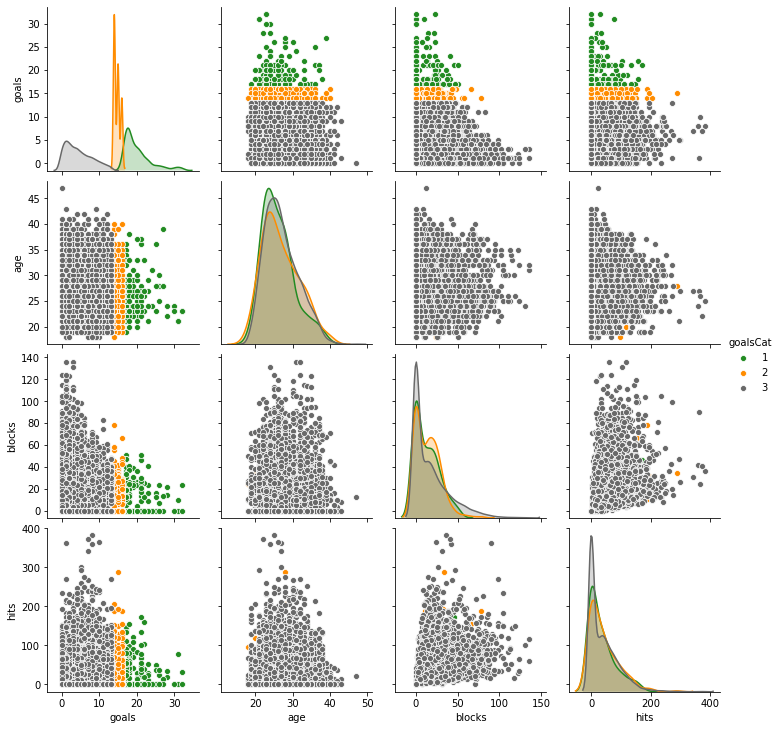

In [64]:
my_colors = ['forestgreen','darkorange','dimgrey','dimgrey'] #variable of colors for pairplot to maintain consistent color throughout project
sns.pairplot(df, hue='goalsCat', vars=['goals','age','blocks','hits'], palette=my_colors)

<div style="background-color:lightblue;">
    
### Scatterplot for Closer Look at Goals Data with Shots and Time-On-Ice
    
The scatterplot color comparison is based upon the Goals Category in the pairplots above. Group 1 (blue) has the highest goals scored per season, Group 2 (orange) has the 2nd highest goals scored per season, and Group 3 (green) has the least amount of goals scored per season.
    
The purpose of this scatterplot is to simply present a larger visualization of two pairplots above where the top goal scorers stand regarding shots and time-on-ice.
    
- A higher number of goals mostly correlates with a higher number of shots and more time-on-ice accrued.
- For the most part, Groups 1 and 2 are evenly spread out among shots and time-on-ice. However, it interesting to note that the triangular/trapezoid shaped scatterplot reveals an upward trend for Group 1 in these categories. In other words, as more goals are scored, the number of shots taken and shot percentage gradually increase, and more time-on-ice is accrued.
        
</div>

Text(0.5, 0, 'Goals Scored Per Season')

Text(0, 0.5, 'Shots Taken Per Season')

Text(0.5, 1.0, 'Correlation Between Goals and Shots from 1999-2018')

Text(0.5, 0, 'Goals Scored Per Season')

Text(0, 0.5, 'Time-On-Ice Per Season')

Text(0.5, 1.0, 'Correlation Between Goals and Time-On-Ice from 1999-2018')

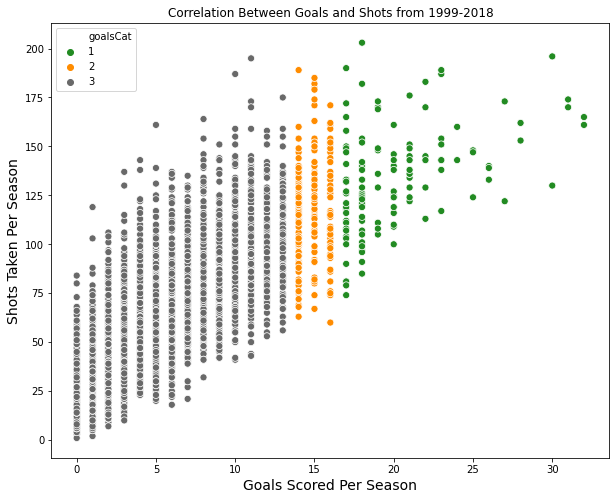

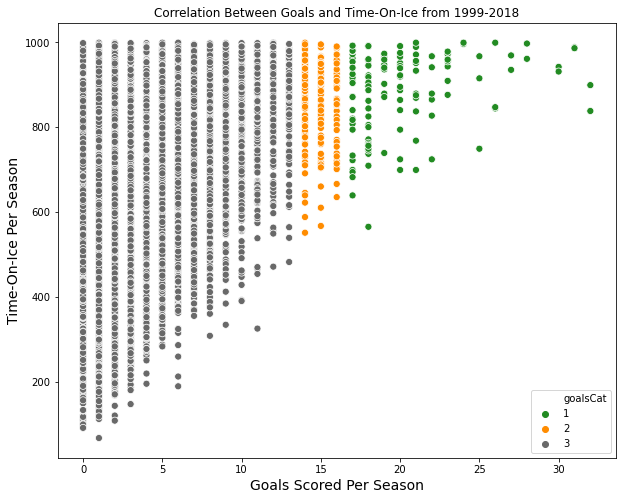

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x = 'goals', y = 'shots', hue = 'goalsCat',
                    palette = {1:"forestgreen", 2:"darkorange", 3:"dimgrey"},
                    data = df, legend='full', s=50)

ax.set_xlabel('Goals Scored Per Season', fontsize=14)
ax.set_ylabel('Shots Taken Per Season', fontsize=14)
ax.set_title('Correlation Between Goals and Shots from 1999-2018')



fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x = 'goals', y = 'time_on_ice', hue = 'goalsCat',
                    palette = {1:"forestgreen", 2:"darkorange", 3:"dimgrey"},
                    data = df, legend='full', s=50)

ax.set_xlabel('Goals Scored Per Season', fontsize=14)
ax.set_ylabel('Time-On-Ice Per Season', fontsize=14)
ax.set_title('Correlation Between Goals and Time-On-Ice from 1999-2018')

<div style="background-color:lightblue;">
    
### Scatterplot for Closer Look at Goals Data with Blocks and Hits
    
The scatterplot color comparison is based upon the Goals Category in the pairplots above. Group 1 (blue) has the highest goals scored per season, Group 2 (orange) has the 2nd highest goals scored per season, and Group 3 (green) has the least amount of goals scored per season.
    
The purpose of this scatterplot is to simply get a bigger example of two pairplots above where the top goal scorers stand regarding blocks and hits.
    
- Regarding blocks and hits, there is a downward trend for Group 1. This reveals that as more goals are scored, blocks and hits gradually decrease. This may indicate that as players score more goals, they become less concerned with earning blocks and hits. This may come in handy when general managers decide which players to acquire, e.g., signing a Group 1 goal scorer may necessitate the additional signing of a defensive/'enforcer' type player to balance out the offensive dynamics on ice.  
    
</div>

Text(0.5, 0, 'Goals Scored Per Season')

Text(0, 0.5, 'Blocks Per Season')

Text(0.5, 1.0, 'Correlation Between Goals and Blocks from 1999-2018')

Text(0.5, 0, 'Goals Scored Per Season')

Text(0, 0.5, 'Hits Per Season')

Text(0.5, 1.0, 'Correlation Between Goals and Hits from 1999-2018')

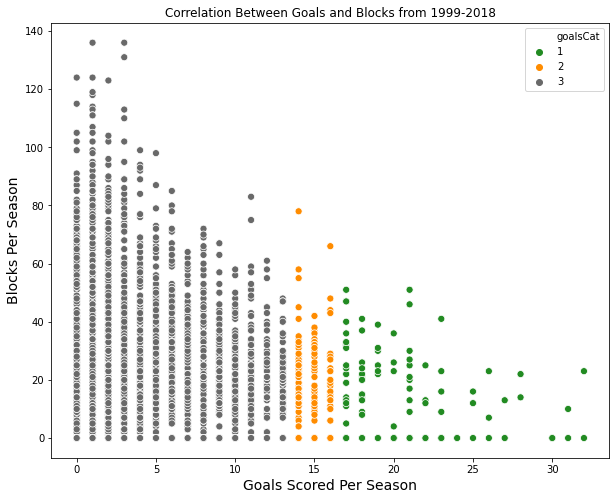

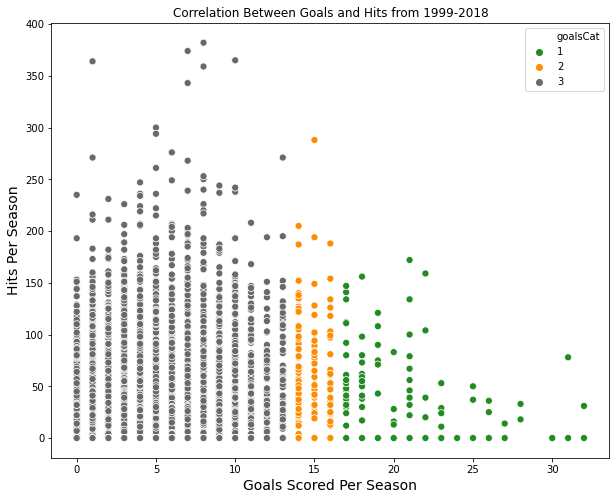

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x = 'goals', y = 'blocks', hue = 'goalsCat',
                    palette = {1:"forestgreen", 2:"darkorange", 3:"dimgrey"},
                    data = df, legend='full', s=50)

ax.set_xlabel('Goals Scored Per Season', fontsize=14)
ax.set_ylabel('Blocks Per Season', fontsize=14)
ax.set_title('Correlation Between Goals and Blocks from 1999-2018')



fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x = 'goals', y = 'hits', hue = 'goalsCat',
                    palette = {1:"forestgreen", 2:"darkorange", 3:"dimgrey"},
                    data = df, legend='full', s=50)

ax.set_xlabel('Goals Scored Per Season', fontsize=14)
ax.set_ylabel('Hits Per Season', fontsize=14)
ax.set_title('Correlation Between Goals and Hits from 1999-2018')

<div style="background-color:lightblue;">

## Snapshot of player profiles in Groups 1, 2, and 3. 
Based upon the Goals Category, Group 1 has the highest goals scored per season, Group 2 has the 2nd highest goals scored per season, and Group 3 has the least amount of goals scored per season.

- This output simply provides player reference points to possibly incorporate into the final report paper to highlight a specific example alongside the pairplot analyses.
    
</div>

In [67]:
group1 = df[df['goalsCat'] == 1]
group1.head(10)
group2 = df[df['goalsCat'] == 2]
group2.head(10)
group3 = df[df['goalsCat'] == 3]
group3.head(10)

,season,player,age,team,position,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits,goalsRank,goalsCat
18,2018,Patrik Berglund,29,STL,C,57,17,0.2982,9,26,112,15.0,921.0,36,111,5163.0,1
120,2018,Mark Jankowski,23,CGY,C,72,17,0.2361,8,25,118,14.0,962.0,51,35,5163.0,1
132,2018,Ondrej Kase,22,ANA,RW,66,20,0.3030,18,38,146,14.0,919.0,26,28,5218.0,1
177,2018,Nino Niederreiter,25,MIN,RW,63,18,0.2857,14,32,133,14.0,945.0,20,58,5192.0,1
260,2018,Miles Wood,22,NJD,LW,76,19,0.2500,13,32,170,11.0,947.0,22,75,5203.0,1
264,2017,Josh Anderson,22,CBJ,RW,78,17,0.2179,12,29,119,14.0,938.0,40,147,5163.0,1
268,2017,Andreas Athanasiou,22,DET,C,64,18,0.2813,11,29,120,15.0,862.0,21,30,5192.0,1
339,2017,Alex Galchenyuk,22,MTL,C,61,17,0.2787,27,44,104,16.0,972.0,32,36,5163.0,1
360,2017,Ryan Hartman,22,CHI,LW,76,19,0.2500,12,31,170,11.0,970.0,30,121,5203.0,1
404,2017,Anthony Mantha,22,DET,RW,60,17,0.2833,19,36,133,13.0,954.0,33,46,5163.0,1


,season,player,age,team,position,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits,goalsRank,goalsCat
10,2018,David Backes,33,BOS,RW,57,14,0.2456,19,33,160,9.0,878.0,25,137,5016.0,2
11,2018,Sven Baertschi,25,VAN,LW,53,14,0.2642,15,29,82,17.0,827.0,29,19,5016.0,2
23,2018,Mikkel Boedker,28,SJS,LW,74,15,0.2027,22,37,119,13.0,988.0,24,41,5085.0,2
55,2018,Brett Connolly,25,WSH,RW,70,15,0.2143,12,27,67,22.0,840.0,24,72,5085.0,2
71,2018,Joonas Donskoi,25,SJS,RW,66,14,0.2121,18,32,129,11.0,988.0,28,28,5016.0,2
138,2018,Chris Kreider,26,NYR,LW,58,16,0.2759,21,37,137,12.0,906.0,24,103,5132.0,2
169,2018,Sonny Milano,21,CBJ,LW,55,14,0.2545,8,22,69,20.0,641.0,11,28,5016.0,2
192,2018,Zach Parise,33,MIN,LW,42,15,0.3571,9,24,119,13.0,717.0,37,26,5085.0,2
250,2018,Austin Watson,26,NSH,LW,76,14,0.1842,5,19,96,15.0,937.0,78,187,5016.0,2
303,2017,Brett Connolly,24,WSH,RW,66,15,0.2273,8,23,81,19.0,706.0,12,89,5085.0,2


,season,player,age,team,position,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits,goalsRank,goalsCat
0,2018,Pontus Aberg,24,TOT,LW,53,4,0.0755,12,16,70,6.0,645.0,8,24,2786.0,3
1,2018,Noel Acciari,26,BOS,C,60,10,0.1667,1,11,66,15.0,775.0,41,152,4552.0,3
2,2018,Michael Amadio,21,LAK,C,37,4,0.1081,4,8,28,14.0,345.0,9,18,2786.0,3
3,2018,Andy Andreoff,26,LAK,LW,45,3,0.0667,6,9,47,6.0,423.0,11,77,2288.0,3
4,2018,Sven Andrighetto,24,COL,RW,50,8,0.1600,14,22,111,7.0,724.0,18,38,4128.0,3
5,2018,Victor Antipin,25,BUF,D,47,0,0.0000,10,10,40,0.0,718.0,41,14,502.0,3
6,2018,Darren Archibald,27,VAN,RW,27,4,0.1481,5,9,28,14.0,401.0,14,80,2786.0,3
7,2018,Josh Archibald,25,TOT,RW,42,5,0.1190,6,11,42,12.0,502.0,16,86,3192.0,3
8,2018,Joel Armia,24,WPG,RW,79,12,0.1519,17,29,128,9.0,996.0,39,86,4826.0,3
9,2018,Yohann Auvitu,28,EDM,D,33,3,0.0909,6,9,69,4.0,447.0,26,18,2288.0,3


<div style="background-color:lightblue;">
    
## Boxplot with Categorical Variables
    
The purpose of this boxplot is to provide a high-level visualization of Groups 1, 2, and 3 of the Goals Category, to possibly utilize in the final report paper.
- This boxplot reveals that Group 1 (blue) has the highest goals scored per season, Group 2 (orange) has the 2nd highest goals scored per season, and Group 3 (green) has the least amount of goals scored per season.
- The outliers in Group 1 reveal that scoring a high number of goals each season is certainly unique, although not uncommon. 
    
</div>

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Goals by Offensive Category')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

Text(0.5, 0, 'Goal Category')

Text(0, 0.5, 'Goals')

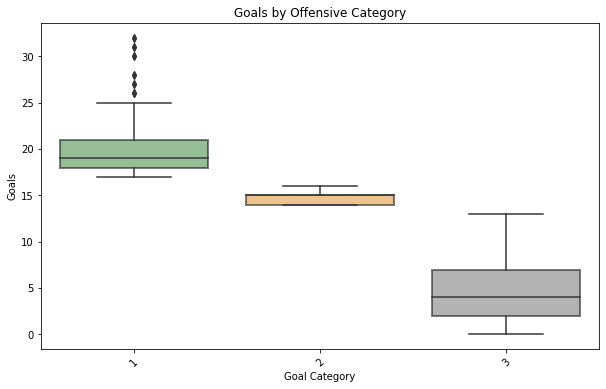

In [68]:

order = [1,2,3] #creating a variable to display the order of each category on the boxplot. 
my_colors = ['forestgreen','darkorange','dimgrey'] #variable of colors to maintain consistent color scheme throughout project

plt.figure(figsize = (10, 6)) #setting plot size
ax = sns.boxplot(x='goalsCat', y='goals', data=df, order=order, palette=my_colors) #placing the boxplot into a variable in order to set parameters later
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k") #setting parameters of boxplot
plt.title('Goals by Offensive Category') #naming the boxplot
plt.xticks(rotation=45) #setting xtick labels at an angle to highlight that the xticks are category numbers
plt.xlabel('Goal Category') #naming the x coordinates
plt.ylabel('Goals') #naming the y coordinates

<div style="background-color:lightblue;"> 
    
# Project Findings 

</div>

<b>Introduction</b> <br>
It is widely accepted among NHL fans that NHL players who rack up higher numbers in categories like shots, games played, and time-on-ice are more likely to score a higher number of goals and assists in a season. This report explores these assumptions by analyzing 20 seasons of offensive NHL statistics. The data was collected from publicly available NHL stats compiled at hockey-reference.com and inalitic.com in a CSV file. The data contains mostly offensive categories, and the population represented is every NHL player from 1940-2018 who earned offensive statistics in at least one category. The categories for analysis include a player’s position, goals, assists, points, shots, games played, time-on-ice, blocks, and hits. More specifically, each category was analyzed to discover how they correlate with higher goals and assists scored in a season, and which position typically earns the most goals, assists, blocks, and hits per season. The following four hypotheses are tested:
1.	Players who earn higher numbers in games played, shots, and time-on-ice are more likely to score more goals and assists in a season. 
2.	Left-Wing (LW) and Right-Wing (RW) positions are the most offensive-minded players.
3.	Centers (C) are the playmakers of the game.
4.	Defensemen (D) and Centers (C) are the most physically demanding positions.<br>

<b>Data Preparation and Analysis</b> <br>
The raw dataset contained 37,826 rows and 28 columns. All entries were converted to the proper data types, and entries with missing or nulls values were replaced with an integer value of ‘0’. All rows and columns with significant outliers were dropped, specifically players who achieved 100% shot percentage and/or 0-50 minutes of time-on-ice because in any given season, it is virtually impossible for players to achieve this. As a result, only players with 26 or more games played and more than 50 minutes of time-on-ice were retained in the original dataset in order to create a realistic benchmark for all statistics earned. From this, a total of 32,563 rows were eliminated leaving a remainder of 5,262 rows and 15 columns from seasons 1999-2018. Players were also separated into three categories: 1) Category 1 (goalsCat1) representing players who averaged 17 or more goals per season, 2) Category 2 (goalsCat2), representing players who averaged 14-16 goals per season, and 3) Category 3 (goalsCat3), representing players who averaged 0-13 goals per season. Table 1 provides more detail about the variables used throughout this exploratory data analysis.<br>

<br><b>Hypothesis 1 – Higher Games Played, Time-On-Ice, and Shots Lead to More Goals and Assists.</b><br>

<b>Games Played and Goals.</b><br>
No significant patterns were revealed between the number of games played and goals scored. In fact, nearly 100% of players who played 80 or more games in a season scored less than 20 goals a season. This may indicate that quality of ice-time per game is more significant than the sheer number of games played. The hypothesis that more game played lead to mores goals scored was unsupported.
  
<b>Time-On-Ice, Goals and Assists.</b>
High positive correlations were discovered between time-on-ice, goals, and assists. For example, to hit the 10-goal mark, players played at least 300 minutes; to hit the 20-goal mark, players played at least 700 minutes, and so on. Also, to hit the 10-assist mark, players played at least 300 minutes; to hit the 20-assist mark, players played at least 500 minutes, and so on. This makes sense because more time-on-ice naturally increases a player’s opportunities to rack up offensive stats. The hypothesis that more time-on-ice leads to more goals and assists was supported and suggests that coaches may want to increase their top players’ ice-time per game to increase their team’s scoring chances.
 

<b>Shots and Goals</b>. Although goals shared positive correlations with a higher number of shots, the data revealed no clear indication that more shots automatically lead to more goals scored. For example, players who tallied 150 or more shots per season ranged between 5-30 goals per season. As a result, this hypothesis was unsupported, but it perhaps indicated that strategizing for better scoring opportunities is key to more goals rather than simply throwing pucks at the net.<br>


<b>Hypothesis 2 – Left-Wing (LW) and Right-Wing (RW) are the most offensive-minded players.</b><br>
The analysis did not support hypothesis 2 because the Center (C) position scored the largest portion of goals every year (Figure 3). This suggests that Centers (C) are arguably the most offensive-minded players on a team. From this, coaches may want to increase ice-time of their Centers (C) to increase their team’s scoring opportunities.


<b>Hypothesis 3 – Centers (C) are the playmakers of the game.</b><br>
The analysis revealed that Centers (C) earn the most assists every year thus supporting hypothesis 3 that Centers (C) are the playmakers of the game. Based upon the nature of the position, this makes sense and reinforces the notion that Centers (C) are arguably the most offensive-minded players on a team. Again, coaches may want to increase ice-time for some, or all, of their Centers (C) due to the offensive nature of their position.
 
 
<b>Hypothesis 4 – Defensemen (D) and Centers (C) are most physically-demanding positions.</b><br>
	Hypothesis 4 was heavily confirmed as Defensemen (D) earned the most blocks every year by nearly a 2 to 1 margin. This makes sense because the Defenseman (D) position is designed to defend against offensive attacks, specifically to prevent shots-on-goal.
Centers (C) recorded the most hits followed by Left-Wing (LW), Right-Wing (RW), and Defenseman (D). It makes sense that Centers (C) tallied the highest number of hits given the grit demanded of its position, but it was surprising to see Defensemen (D) with the least amount of hits given the rough nature of the position to defend against attacks in one’s own zone. This perhaps suggests that aggressive players are often assigned offensive-type positions like Center (C), Right-Wing (RW), or Left-Wing (LW) in order to provide Defensemen (D) more leeway to focus solely on blocks and defense. 
 
 
<b>Conclusion</b><br>
The data revealed that racking up higher numbers in offensive categories does not necessarily lead to scoring more goals. For example, hypothesis 1 was partially supported as increased time-on-ice lead to more goals and assists scored, but surprisingly, more games played did not. This indicated that the quality of ice-time in each game is more important than simply aiming to play a full season of 82 games. Moreover, although goals increased with a higher number of shots, there was no clear indication that a higher number of shots automatically lead to more goals scored. This highlighted that perhaps the key to scoring goals is a player’s or coach’s ability to formulate clever scoring opportunities, rather than simply relying on a player to throw pucks at the net. Again, hypothesis 1 was partially supported.
Hypotheses 2 and 3 were also partially supported as Centers (C) were found to be the most offensive-minded, physically demanding position – while also being the playmaker – making them the most valuable position on a team. From this, coaches may want to consider increasing ice-time for all their Centers (C) in order to increase the team’s scoring chances. Additionally, general managers may want to consider investing larger sums of money to acquire more highly skilled Centers (C) or acquire players that enhance their Centers’ (C) abilities.
Hypothesis 4 was partially supported as Defensemen (D) tallied the most blocks, but surprisingly, Defensemen (D) recorded the least amount of hits each season. This indicated that although the Defenseman (D) position is indeed physically demanding, aggressive players are likely assigned offensive positions in order to give Defensemen (D) more leeway to focus solely on preventing breakouts and protecting the net. 
No difficulties were experienced with the data but it would be interesting to take it a step further and analyze the dynamics of each position with other variables like plus/minus (+/-), penalties-in-minutes (PIM), power-play goals (PPG), and short-handed goals (SHG). It would also be interesting to see how Category 1 players compare to Category 2 and 3 players in the playoffs because playoff hockey is considered entirely different than regul
